# Pruebas con las funciones principales del código

## Importación de librería

In [1]:
from polynomial_preprocessing.extrapolation_process import procesamiento_datos_continuos, procesamiento_datos_grillados
from polynomial_preprocessing.preprocessing import preprocesamiento_datos_a_grillar
from polynomial_preprocessing.optimization import optimizacion_parametros_continuos, optimizacion_parametros_grillados
from polynomial_preprocessing.image_reconstruction import conjugate_gradient
import numpy as np
from scipy.interpolate import griddata
from astropy.io import fits
from matplotlib import pyplot as plt
import astropy.units as unit

## Ejemplo de uso de optimización de parametros:

In [ ]:
ejemplo_opti_dc = optimizacion_parametros_continuos.OptimizacionParametrosContinuos(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav_p513_cell_0.01.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms",  
	poly_limits = [10, 35],
	division_limits = [1e-6, 1e-1],
)

ejemplo_opti_dc.initialize_optimization(5)

In [ ]:
ejemplo_opti_dg = optimizacion_parametros_grillados.OptimizacionParametrosGrillados(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav_p513_cell_0.01.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms",  
	poly_limits = [10, 20],
	division_limits = [1e-7, 1e-1],
)

ejemplo_opti_dg.initialize_optimization(10)

Pixel size of FITS on degree:  -1.944444444444e-06
Pixel size of FITS on radians:  -3.393695767765977e-08 rad
Image size of FITS:  251
Resolución teórica:  8.144757559555597e-08 rad
Tamaño de pixel en radianes:  -3.393695767765977e-08 rad


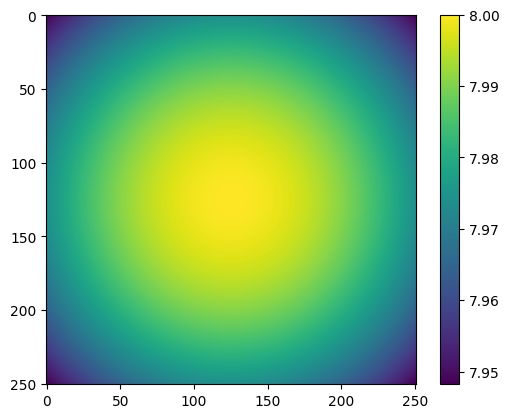

In [ ]:
opti_as205_dg = optimizacion_parametros_grillados.OptimizacionParametrosGrillados(
	"/disk2/stephan/datasets/Sz114/Sz114_p251_cell_0.007.fits",
    "/disk2/stephan/datasets/Sz114/Sz114_continuum_model.ms", 
	poly_limits=[20, 30], 
    division_limits=[10**(-7), 1],
    n_iter_gc=10,
    plots=True)

opti_as205_dg.initialize_optimization(7)

## Ejemplo de uso del procesamiento de datos continuos con los parametros óptimos encontrados anteriormente:

Image size of FITS:  251
Resolución teórica:  1.0512941812754017e-06 rad
Tamaño de pixel en radianes:  -3.501848830393431e-07 rad
dx a entregar:  -3.501848830393431e-07 rad


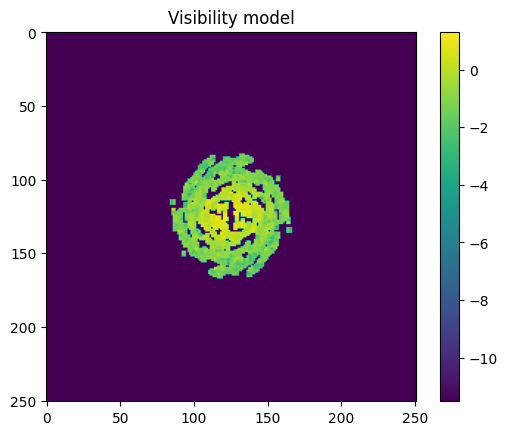

El objeto en el archivo FITS es: HD 142527


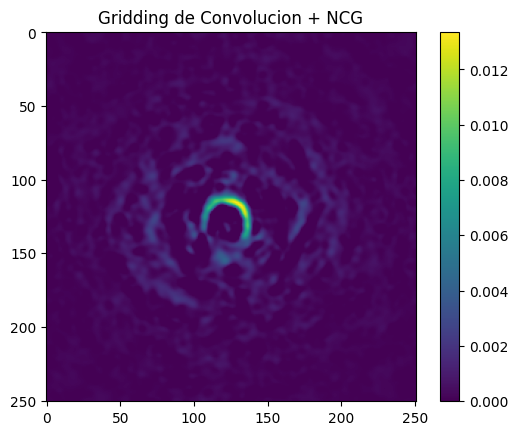

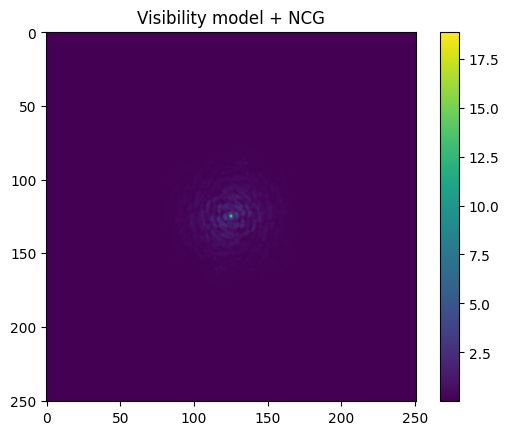

Tiempo de ejecución (Gridding de Conv.): 7.78 segundos


In [16]:
grid_conv_hd142 = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path = "/disk2/stephan/datasets/HD142/hd142_p251_cell_0.03.fits",
    ms_path = "/disk2/stephan/datasets/HD142/hd142_b9cont_self_tav.ms", 
    num_polynomial=20,
    division_sigma=1e-1,
    pixel_size=-3.501848830393431e-07 * unit.rad,
    verbose=True,
    plots = True,
    gpu_id=0)

reconstructed_image, vis_recons_image = grid_conv_hd142.convolutional_gridding()

Image size of FITS:  251
Resolución teórica de MS:  1.501848830393431e-07 rad
visibilidades dim. MS:  (15125, 1, 2)
visibilidades gridd. MS:  (15125,)
u_target:  (251, 251)
v_target:  (251, 251)
chunk_data:  21
Max. polynomial degree: 20
Division: 0.1
Sigma: 6988.3416748046875
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
Tiempo de ejecución: 17.91 segundos
El objeto en el archivo FITS es: HD 142527


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



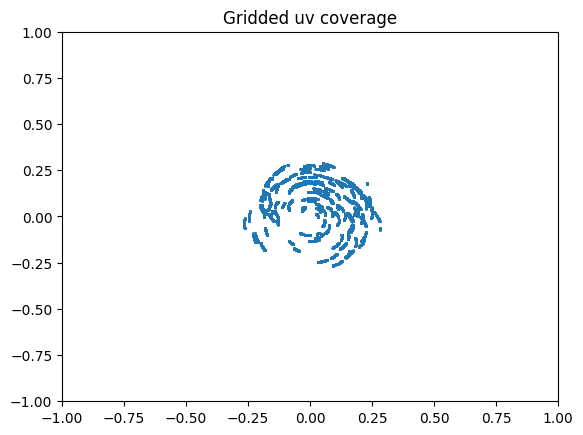

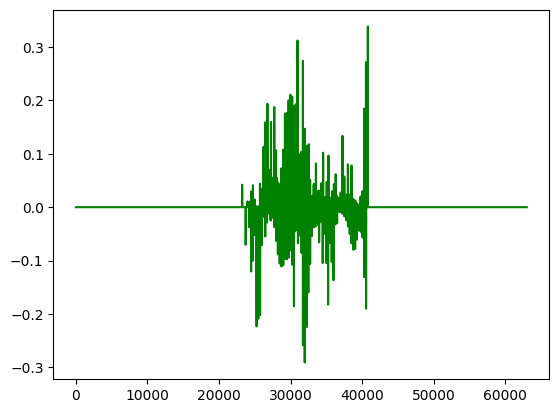

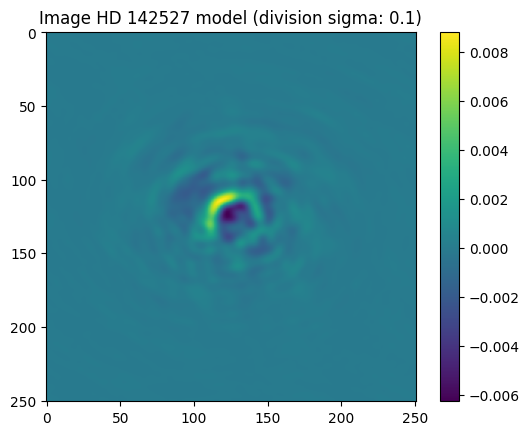

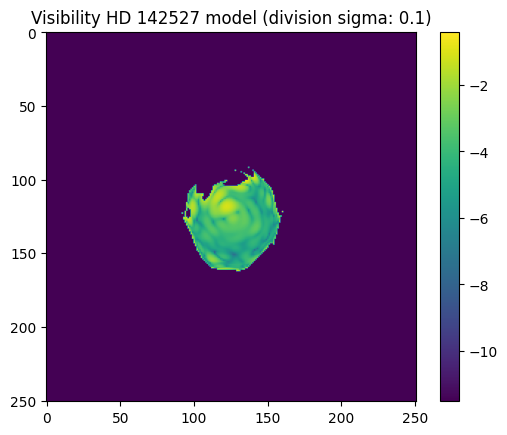

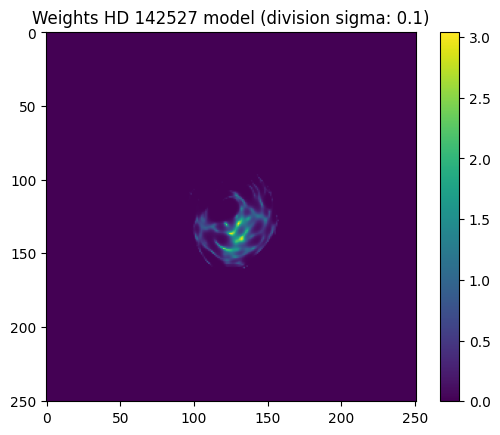

In [ ]:
ejemplo_dc_hd142 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
	fits_path = "/disk2/stephan/datasets/HD142/hd142_p251_cell_0.03.fits",
    ms_path = "/disk2/stephan/datasets/HD142/hd142_b9cont_self_tav.ms", 
	num_polynomial = 20, 
    division_sigma =  10**(-1),
    pixel_size= 0.0007310213536,
    n_iter_gc = 10,
    verbose = True,
    plots = True
)

ejemplo_dc_hd142.data_processing()

In [ ]:
ejemplo_dc_hd142 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
	fits_path = "/disk2/stephan/datasets/DSHARP/HD143006/HD143006_p301_cell_0.00475.fits",
    ms_path = "/disk2/stephan/datasets/DSHARP/HD143006/HD143006_continuum.ms", 
	num_polynomial = 40, 
    division_sigma =  0.0750780409680797,
    n_iter_gc = 50,
    verbose = False,
    plots = True
)

ejemplo_dc_hd142.data_processing()

In [2]:
ejemplo_dg_gwlup = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	fits_path = "/disk2/stephan/datasets/DSHARP/AS209/v4/AS209_p613_cell_0.004.fits", # Path del archivo FITS
    ms_path = "/disk2/stephan/datasets/DSHARP/AS209/v4/AS209_continuum_model_v4.ms", # Path del archivo MS
	num_polynomial = 37, # Numero de grado de polinomios
    division_sigma =  0.00000750780409680797, # División sigma
    n_iter_gc= 10, # Numero de iteraciones para GC
    verbose = False, # Flag para indicar si guardar archivos (fits de salida, visib, pesos, etc) en el disco duro.
    plots = True, # Flag para indicar si se mostrarán gráficos de salida durante el procesamiento.
    gpu_id=2 # ID de GPU para trabajar (en beam: de 0 a 3)
)

Pixel size of FITS on degree:  -1.111111111111e-06
Pixel size of FITS on radians:  -1.9392547244379502e-08 rad
Image size of FITS:  613


self.pixel_size:  -1.9392547244379502e-08 rad
self.image_size:  613
Resolución teórica:  9.958839605046412e-08 rad
Tamaño de pixel en radianes:  -1.9392547244379502e-08 rad


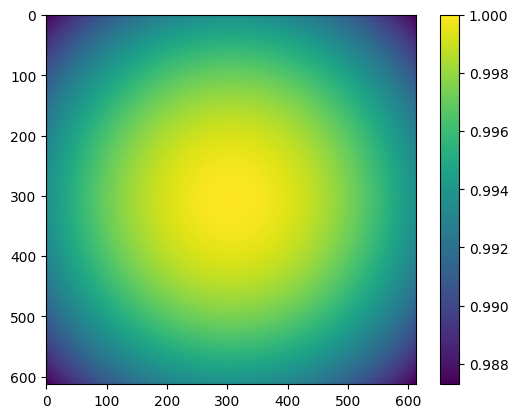

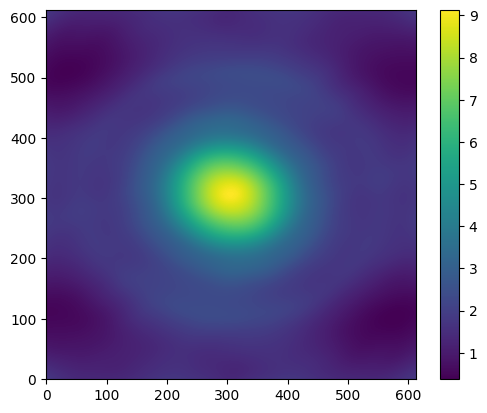

dx a entregar:  -1.9392547244379502e-08 rad


In [3]:
gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v = ejemplo_dg_gwlup.grid_data()

u_data :  (16251,)
v_data:  (16251,)


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



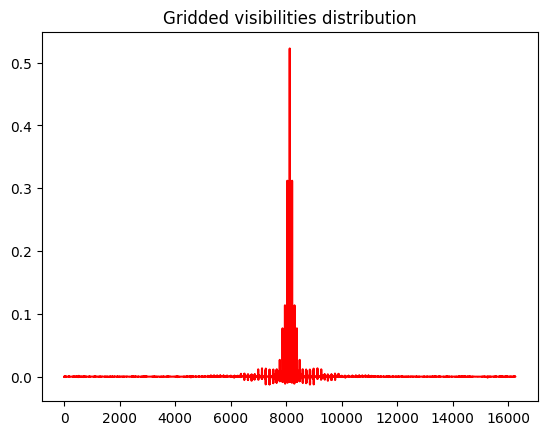

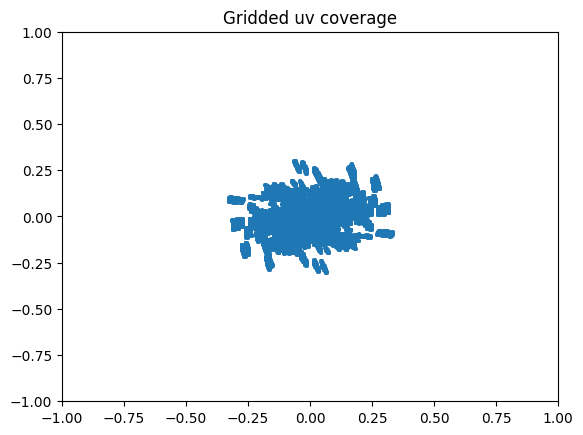

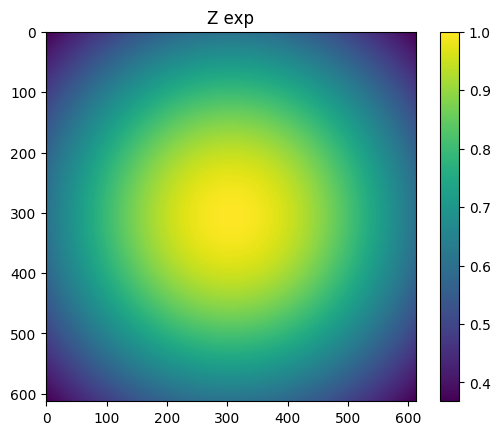

38
Max. polynomial degree: 37
Division: 7.50780409680797e-06
Sigma: 34156912553036.63
Polinomios inicializados.
Polinomios normalizados.


OutOfMemoryError: Out of memory allocating 8,230,844,416 bytes (allocated so far: 8,602,434,560 bytes).

In [4]:
dirty_image, vis, weights, _, _, reconstructed_image, reconstructed_vis_image = ejemplo_dg_gwlup.gridded_data_processing(gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v)

MAX FINAL: (0.00018207028376184293-3.975158556542978e-06j)
MIN FINAL: (-0.051381775852046986-0.0031367444541455913j)


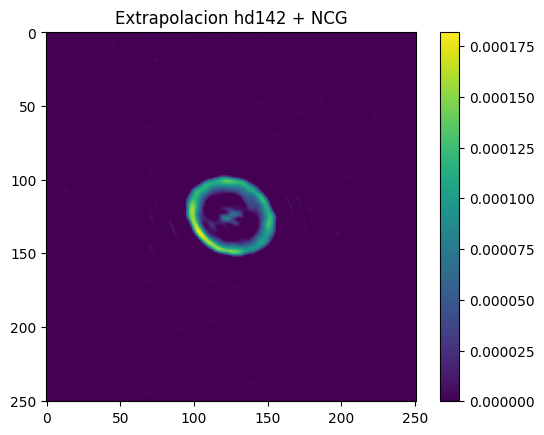

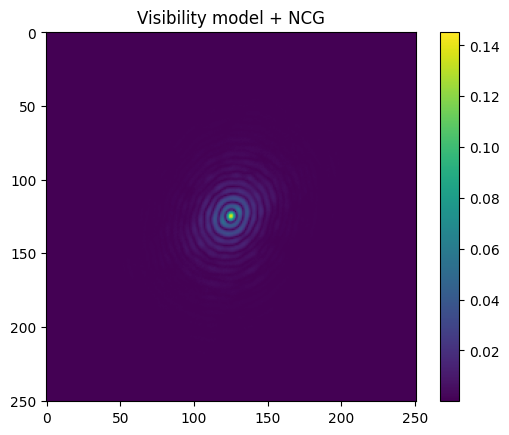

In [23]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 10)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))

fits_image = fits.open("/disk2/stephan/datasets/HD100546/hd100546_p251_cell_0.008.fits")

header = fits_image[0].header

#fits.writeto("extrapolacion_sz114.fits", np.real(gc_image_model), header, overwrite=True)


title="Extrapolacion hd142 + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

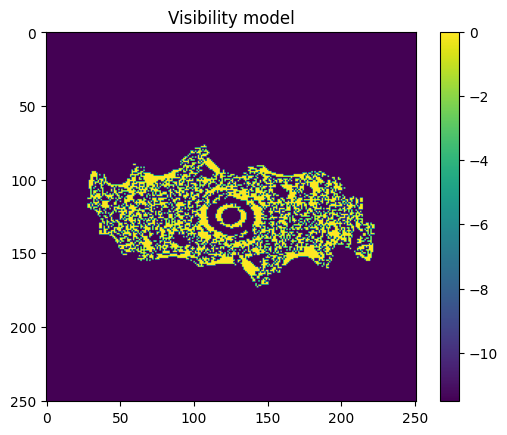

In [27]:
gridded_visibilities_2d = gridded_visibilities[0]

vis_orig_binario = (gridded_visibilities_2d > 0).astype(int)
vis_orig_binario = np.rot90(np.flipud(vis_orig_binario), 1)
vis_agregadas_binario = (vis > 0).astype(int)
vis_agregadas = vis_orig_binario - vis_agregadas_binario

title = "Visibility model"; fig = plt.figure(title); plt.title(title); im = plt.imshow(np.log(np.absolute(vis_agregadas) + 0.00001))
plt.colorbar(im)

# plt.show()

[[ 9.1774378e-04  6.7667873e-04  5.5564044e-04 ...  7.0675550e-04
   5.1880529e-04  2.5298359e-04]
 [ 6.5311510e-04  1.9743283e-04 -1.4506205e-04 ... -1.7101910e-04
  -4.0209302e-04 -5.3788489e-04]
 [-3.1176236e-04 -9.7593339e-04 -1.4923550e-03 ... -4.7964972e-04
  -7.7110011e-04 -9.1835536e-04]
 ...
 [-4.9086282e-04 -4.1284523e-04 -4.0025613e-04 ...  2.3012408e-03
   1.9311958e-03  1.4930946e-03]
 [-5.2906841e-04 -5.4815161e-04 -6.9521234e-04 ...  1.0129570e-03
   6.0409500e-04  1.7724754e-04]
 [-1.2632087e-03 -1.3759303e-03 -1.6300066e-03 ...  4.6898334e-04
   1.6526632e-04 -2.8492983e-05]]
[[ 1.23380832e-02  8.28282830e-03  2.65256856e-03 ...  4.73180617e-03
   8.65940037e-03  1.22866242e-02]
 [ 1.21790686e-02  5.57070924e-03 -2.80310487e-17 ...  7.04708925e-03
   1.17815930e-02  1.47407816e-02]
 [ 1.17187959e-02  2.52210414e-03  1.71414944e-17 ...  1.14101628e-02
   1.58887622e-02  1.72949438e-02]
 ...
 [ 1.30427732e-02  1.09932344e-02  6.44670890e-03 ...  1.27266399e-02
   1.13557

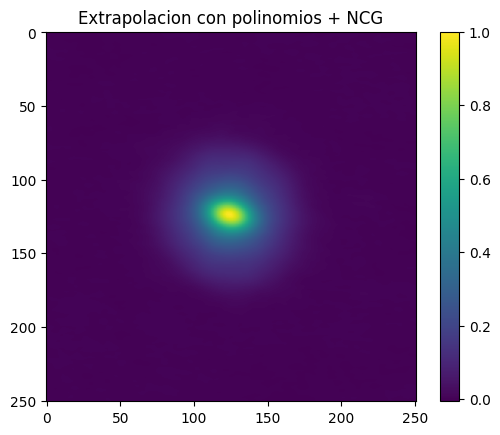

In [7]:
def comp_imagenes_model(imagen_verdad, imagen_algoritmo):
    imagen_verdad/=np.max(imagen_verdad)

    print(imagen_verdad)
    
    imagen_algoritmo/=np.max(imagen_algoritmo)

    print(imagen_algoritmo)
    
    imagen_residuo = imagen_verdad - imagen_algoritmo

    print(imagen_residuo)
    
    desviacion = np.std(imagen_residuo)
    
    return desviacion


fits_image = fits.open("/disk2/stephan/datasets/Sz114/Sz114_p251_cell_0.007.fits")

header = fits_image[0].header
data = fits_image[0].data.squeeze()

desv = comp_imagenes_model(data, np.real(gc_image_model))

print(desv)

title="Extrapolacion con polinomios + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(data)
plt.colorbar(im)

In [7]:
ejemplo_dg = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
	fits_path = "/disk2/stephan/datasets/GWLup/GWLup_p251_cell_0.015.fits",
    ms_path = "/disk2/stephan/datasets/GWLup/GWLup_continuum_model.ms", 
    plots = True
)


Resolución teórica:  8.144757559555597e-08 rad
El valor de tamaño de pixel no ha sido ingresado, se usará el del archivo FITS (está en grados).
Valor de FITS en grados:  -4.166666666667e-06


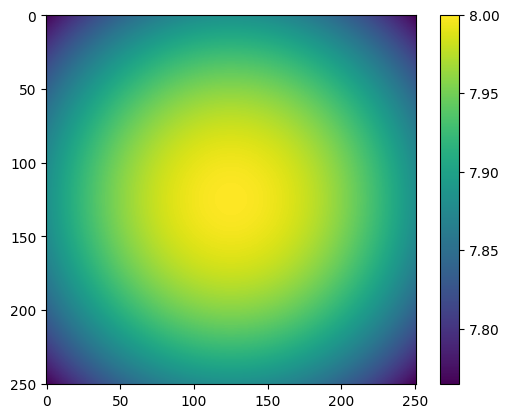

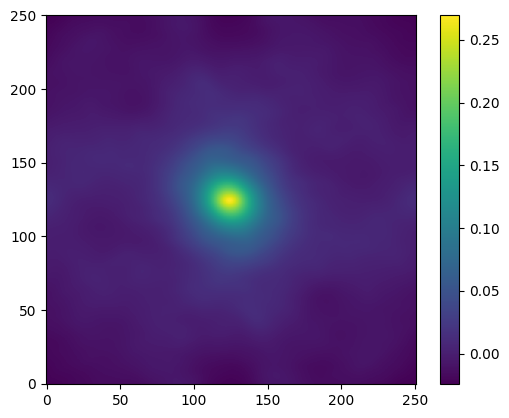

dx a entregar:  -4.166666666667e-06 deg


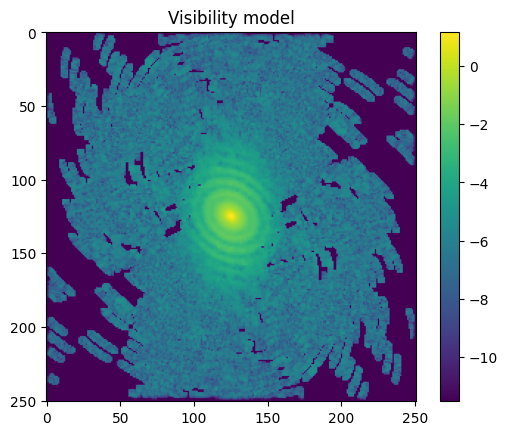

gridded_visibilities_2d:  (251, 251)
gridded_weights_2d:  (251, 251)
MAX FINAL: (0.004458210640944432-7.088103297662671e-13j)
MIN FINAL: (-0.0019173204526961843-0.0012049276310001707j)


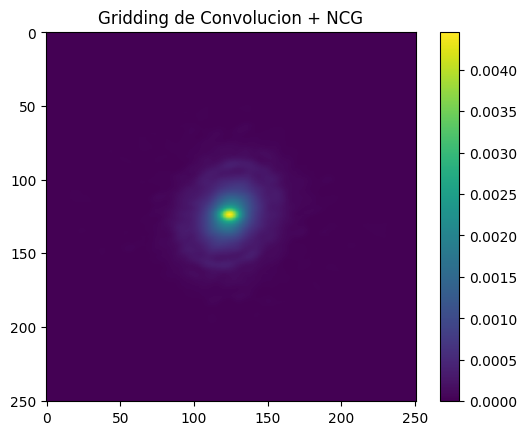

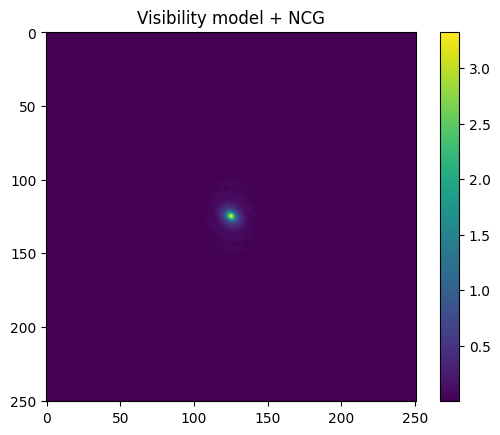

In [8]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

visibilidades_grilladas, pesos_grillados, dx, u, v = ejemplo_dg.process_ms_file()

gridded_visibilities_2d = visibilidades_grilladas[0]  # (1,251,251)->(251,251)

title = "Visibility model"; fig = plt.figure(title); plt.title(title); im = plt.imshow(np.log(np.absolute(gridded_visibilities_2d) + 0.00001))
plt.colorbar(im)

plt.show()

gridded_weights_2d = pesos_grillados[0]  # (1,251,251)->(251,251)

print("gridded_visibilities_2d: ", visibilidades_grilladas[0].shape)
print("gridded_weights_2d: ", pesos_grillados[0].shape)


gc_image_1 = conjugate_gradient.ConjugateGradient(gridded_visibilities_2d, gridded_weights_2d/norm(gridded_weights_2d.flatten(), gridded_visibilities_2d.flatten()), 10)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))

gc_image_model = np.rot90(gc_image_model, 2)


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))

fits_image = fits.open("/disk2/stephan/datasets/HD143006/HD143006_p251_cell_0.015.fits")

header = fits_image[0].header

fits.writeto("gridding_convolucion_HD143006d.fits", np.real(gc_image_model), header, overwrite=True)

title="Gridding de Convolucion + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

gw_sparse.shape:  (3523,)
u_sparse:  (3523,)
v_sparse:  (3523,)
z_sparse.shape:  (3523,)


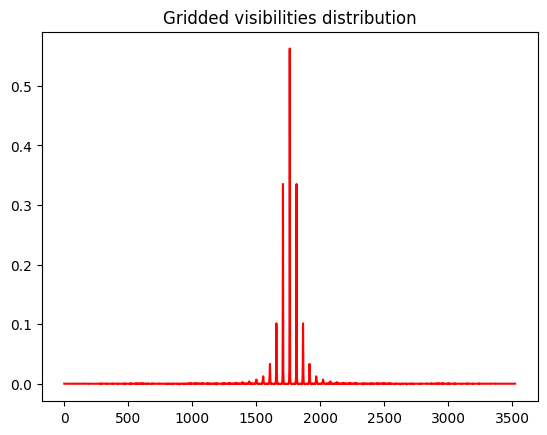

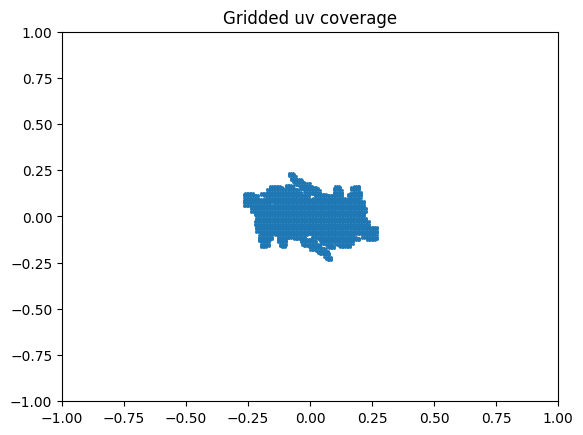

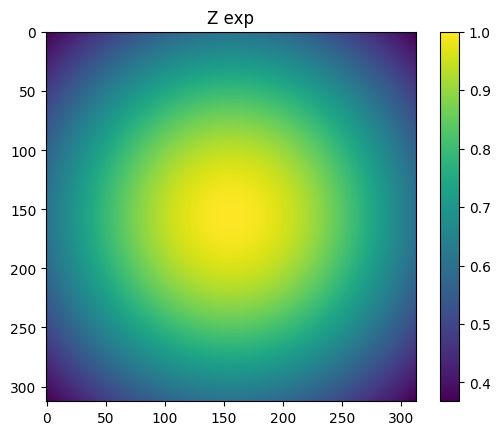

29
Max. polynomial degree: 40
Division: 0.046207724495770736
Sigma: 5505753048.352019
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
visibilities_mini.shape:  (97969,)
residual.shape:  (3523,)
Tiempo de ejecución: 128.84 segundos
residual.shape:  (3523,)


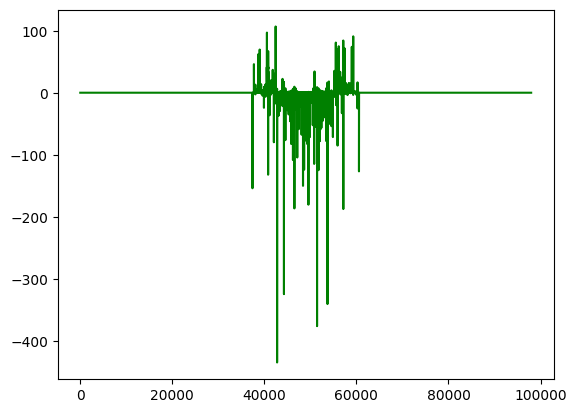

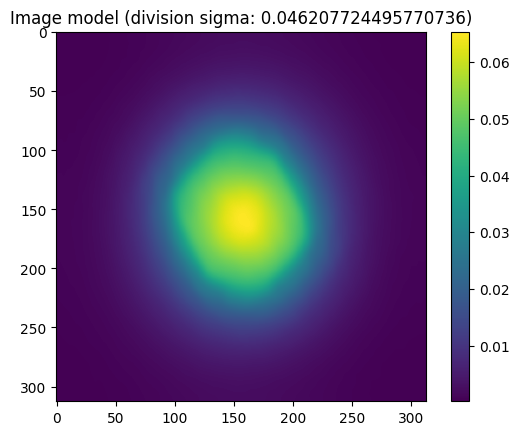

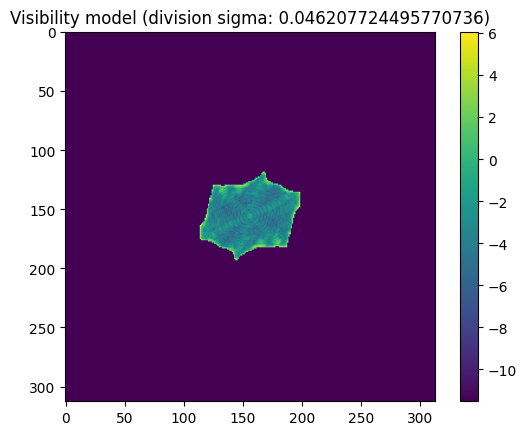

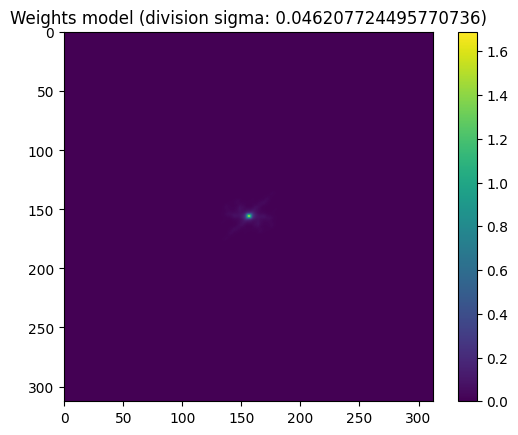

El objeto en el archivo FITS es: V866 Sco


In [17]:
dirty_image, vis, weights, _, _ = ejemplo_dg_as205.gridded_data_processing(gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v)

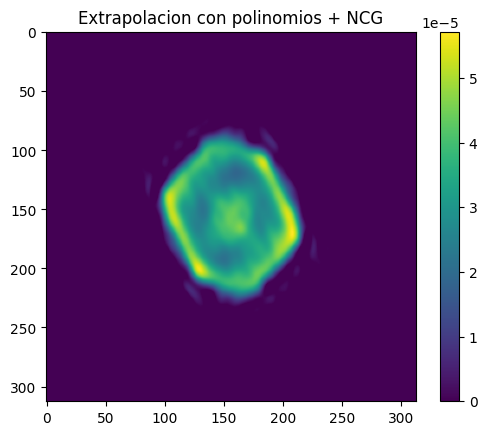

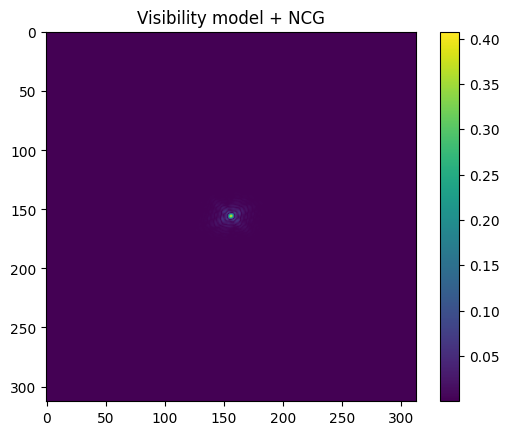

In [18]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_1 = conjugate_gradient.ConjugateGradient(vis, weights/ norm(weights.flatten(),vis.flatten()), 10)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))

title="Extrapolacion con polinomios + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)

plt.show()

In [ ]:
data_fits = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
    fits_path=""
)

In [2]:
ejemplo_dg = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_p0.01_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_continuum.ms",
    plots = True
)

Resolución teórica:  8.144757559555597e-08 rad
El valor de tamaño de pixel no ha sido ingresado, se usará el del archivo FITS (está en grados).
Valor de FITS en grados:  -2.777777777778e-06


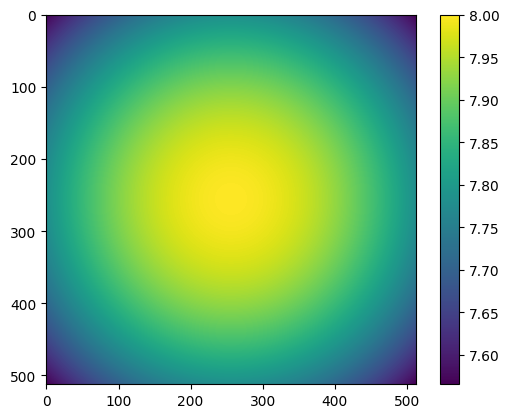

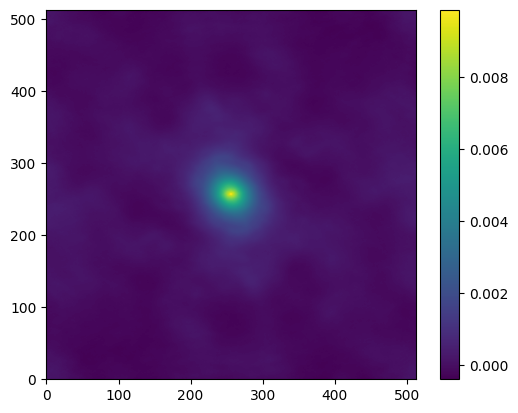

dx a entregar:  -2.777777777778e-06 deg
gridded_visibilities_2d:  (513, 513)
gridded_weights_2d:  (513, 513)


In [3]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

visibilidades_grilladas, pesos_grillados, dx, u, v = ejemplo_dg.process_ms_file()

gridded_visibilities_2d = visibilidades_grilladas[0]  # (1,251,251)->(251,251)
gridded_weights_2d = pesos_grillados[0]  # (1,251,251)->(251,251)

print("gridded_visibilities_2d: ", visibilidades_grilladas[0].shape)
print("gridded_weights_2d: ", pesos_grillados[0].shape)

MAX FINAL: (0.00015825245665208705+1.5748279050591056e-21j)
MIN FINAL: (-0.00045949491415273904-2.6704130790106437e-05j)


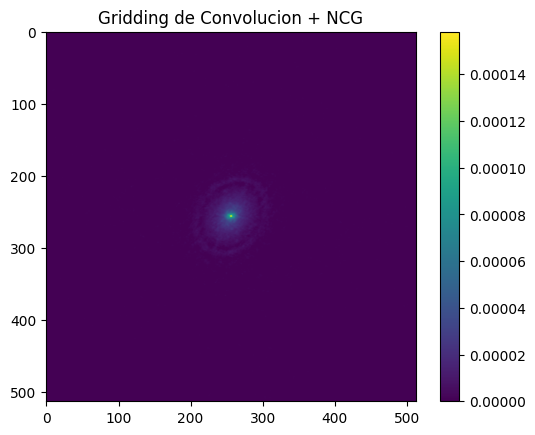

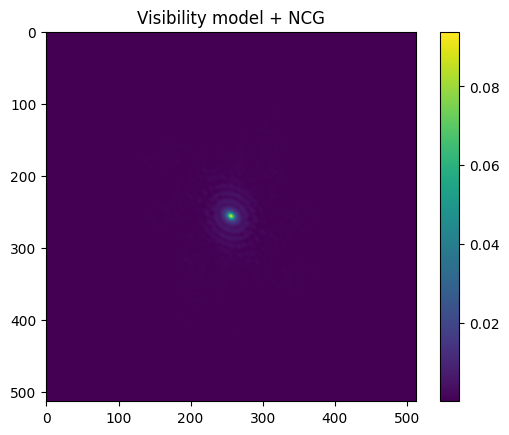

In [4]:
gc_image_1 = conjugate_gradient.ConjugateGradient(gridded_visibilities_2d, gridded_weights_2d/norm(gridded_weights_2d.flatten(), gridded_visibilities_2d.flatten()), 25)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Gridding de Convolucion + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

In [2]:
ejemplo1_gwlup_grid = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_p0.01_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/GWLup/GWLup_continuum.ms", 
	num_polynomial = 40, 
    division_sigma = 0.046207724495770736,
    verbose = False,
    plots = True
)

Pixel size of FITS on degree:  -2.777777777778e-06
Pixel size of FITS on radians:  -4.848136811095747e-08 rad
Image size of FITS:  513


self.pixel_size:  -4.848136811095747e-08 rad
self.image_size:  513
Resolución teórica:  8.144757559555597e-08 rad
Tamaño de pixel en radianes:  -4.848136811095747e-08 rad


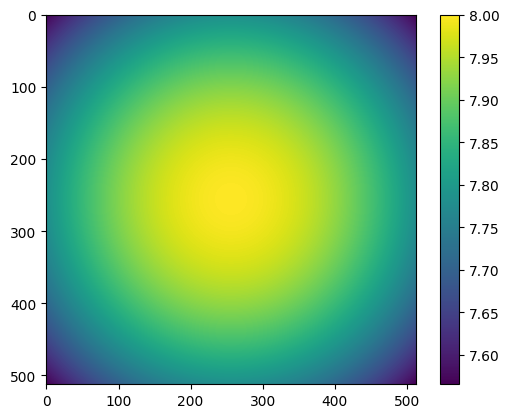

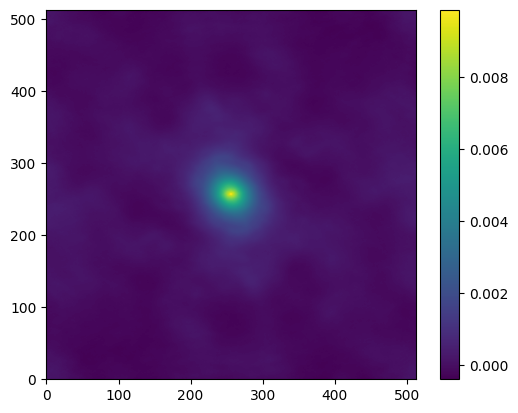

dx a entregar:  -4.848136811095747e-08 rad


In [3]:
gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v = ejemplo1_gwlup_grid.grid_data()

In [ ]:
dirty_image, vis, weights, _, _ = ejemplo1_gwlup_grid.gridded_data_processing(gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v)

In [ ]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 25)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Extrapolacion Polinomios (gwlup) + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

Image size of FITS:  251
Resolución teórica de MS:  1.163536794222228e-08 rad
visibilidades dim. MS:  (279342, 8, 2)
visibilidades gridd. MS:  (279342,)
u_target:  (251, 251)
v_target:  (251, 251)
Max. polynomial degree: 26
Division: 1e-05
Sigma: 282479150.390625
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
Tiempo de ejecución: 119.98 segundos
El objeto en el archivo FITS es: Sz_114


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



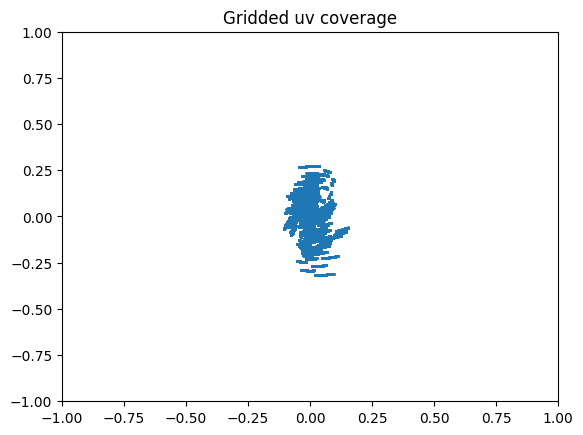

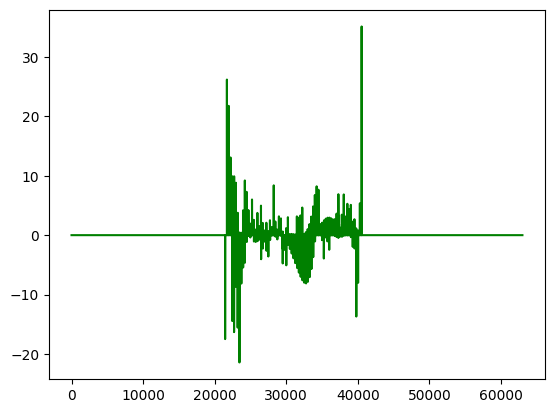

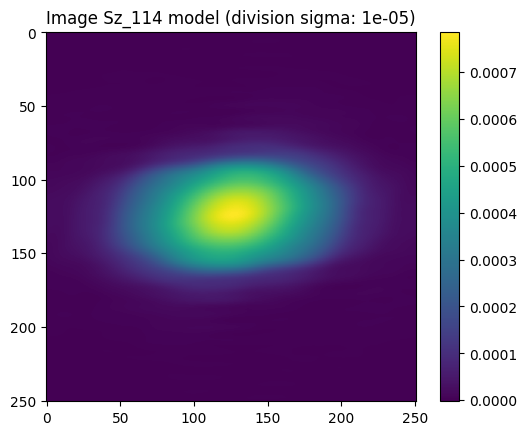

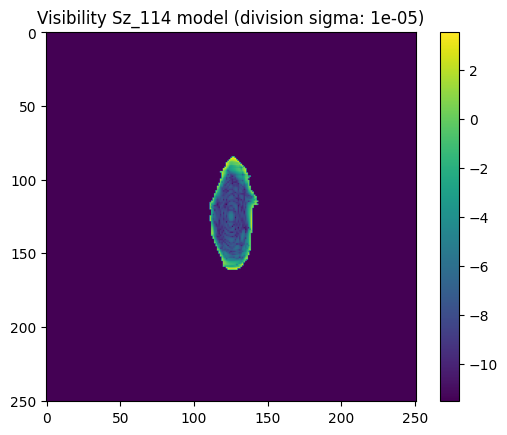

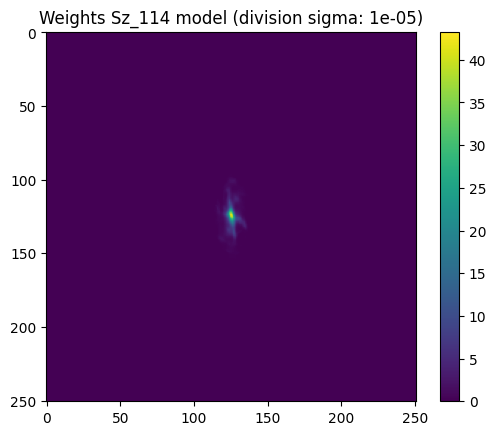

In [8]:
ejemplo1_dc = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
	fits_path="/disk2/stephan/datasets/Sz114/Sz114_p251_cell_0.007.fits",
    ms_path="/disk2/stephan/datasets/Sz114/Sz114_continuum_model.ms", 
	num_polynomial=26, 
    division_sigma=10**(-5),
    pixel_size=-1.163536794222228e-05,
    verbose = False,
    plots = True
)

dirty_image, vis, weights, _, _ = ejemplo1_dc.data_processing()

MAX FINAL: (1.0239460368865087e-06+6.972703094238504e-09j)
MIN FINAL: (-6.138555936001012e-05+0.00026834967022972006j)


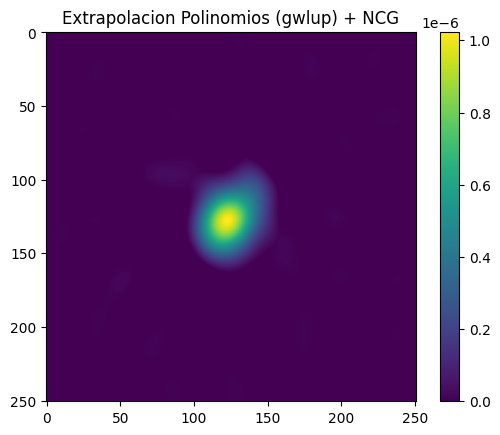

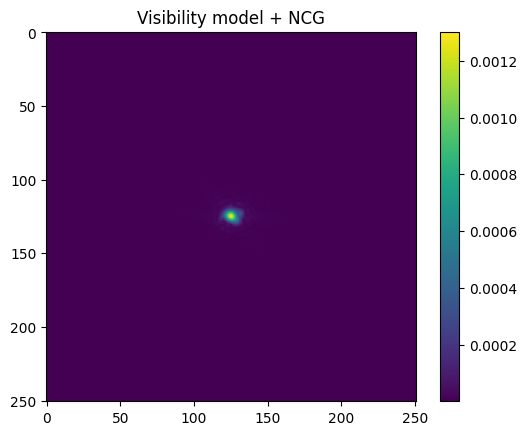

In [14]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 10)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Extrapolacion Polinomios (gwlup) + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

In [ ]:
ejemplo_hd142_dc = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav_p513_cell_0.01.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms", 
    num_polynomial = 20, 
    division_sigma = 0.09783163540608564,
    verbose = False,
    plots = True)

dirty_image_dc, visibilidades_dc, pesos_dc, u_data_dc, v_data_dc = ejemplo_hd142_dc.data_processing()

MAX FINAL: (4.9570238521873935e-12+3.751383264092121e-05j)
MIN FINAL: (-0.378839755384723+0.12374716670903538j)


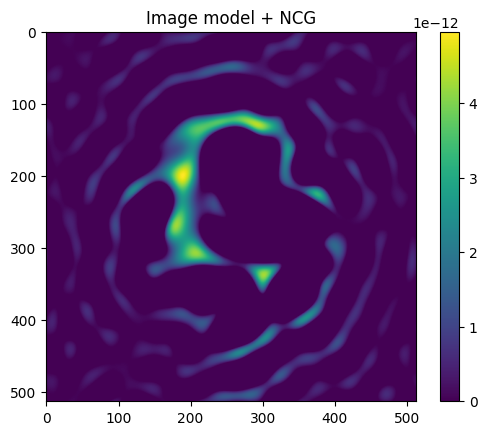

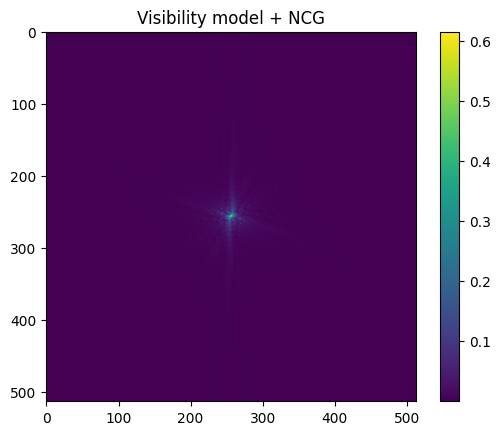

In [5]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(visibilidades_dc, pesos_dc/norm(pesos_dc.flatten(),visibilidades_dc.flatten()), 15)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Image model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

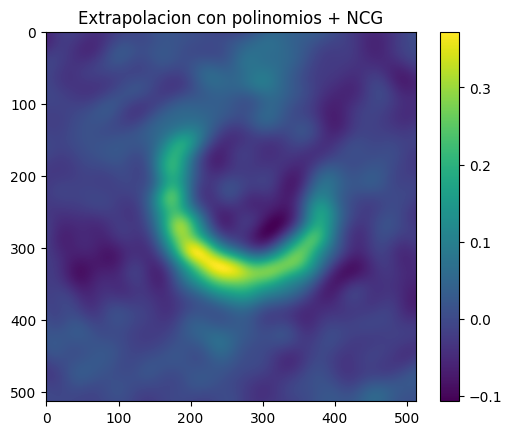

In [14]:
def comp_imagenes_model(imagen_verdad, imagen_algoritmo):
    imagen_verdad/=np.max(imagen_verdad)
    
    imagen_algoritmo/=np.max(imagen_algoritmo)
    
    imagen_residuo = imagen_verdad - imagen_algoritmo
    
    desviacion = np.std(imagen_residuo)
    
    return desviacion


fits_image = fits.open("/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav_p513_cell_0.01.fits")

header = fits_image[0].header
data = fits_image[0].data.squeeze()

fits.writeto("hola_hd142.fits", np.real(gc_image_model), header, overwrite=True)

#desv = comp_imagenes_model(data, np.real(gc_image_model))

#print(desv)

title="Extrapolacion con polinomios + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(data)
plt.colorbar(im)

In [15]:
print("visibilities: ", visibilidades_dc.shape)

print("dirty image: ",dirty_image_dc.shape)

print("weights: ", pesos_dc.shape)

print("u coords: ", u_data_dc.shape)

print("v coords: ", v_data_dc.shape)
      

visibilities:  (251, 251)
dirty image:  (251, 251)
weights:  (251, 251)
u coords:  (15125,)
v coords:  (15125,)


In [4]:
print(pesos_dc)

[[2.84146380e-24 3.11237481e-24 3.40863488e-24 ... 8.86312470e-24
  7.96062475e-24 7.15158905e-24]
 [3.14487681e-24 3.44768363e-24 3.77912347e-24 ... 9.69367521e-24
  8.70082476e-24 7.81143528e-24]
 [3.48063962e-24 3.81910759e-24 4.18992100e-24 ... 1.06030576e-23
  9.51071829e-24 8.53291308e-24]
 ...
 [7.97608292e-24 8.91969331e-24 9.97769674e-24 ... 7.83263375e-24
  7.08675826e-24 6.41175231e-24]
 [7.33015556e-24 8.19183706e-24 9.15727323e-24 ... 7.07986538e-24
  6.41137010e-24 5.80582761e-24]
 [6.73660953e-24 7.52348197e-24 8.40445972e-24 ... 6.39919748e-24
  5.80006312e-24 5.25685037e-24]]


In [5]:
print(u_data_dc)

[  46.69929199   46.69928773  119.07919522 ...  -14.62868347 -112.27899533
  139.15162343]


In [6]:
print(v_data_dc)

[-160.47567874 -160.47567874  -30.99829882 ...   63.89080259   83.9271034
   26.81879913]


In [ ]:
ejemplo_opti_dc_1 = optimizacion_parametros_continuos.OptimizacionParametrosContinuos(
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/FREQ78/mod_in_0.fits",
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/FREQ78/FREQ78.ms",   
	[5, 16],
	[1e-4, 1e-1],
	-1.38 * (10 ** (-7/2)),
	None)

ejemplo_opti_dc_1.initialize_optimization(50)

In [6]:
ejemplo_dc_doar25 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/M87/M87_original_lowfreq.fits",
    "/home/stephan/polynomial_preprocessing/datasets/pyralysis-development-datasets/M87/SR1_M87_2017_101_hilo_hops_netcal_StokesI.selfcal.final.ms", 
    10, 
    0.05972484630085706, 
    -5.5555555555555e-10, 
    None)

Pixel size of FITS:  -5.5555555555555e-10
Image size of FITS:  64


In [ ]:
visibilidades_extrapoladas_dc_doar25, pesos_dc_doar25 = ejemplo_dc_doar25.data_processing()

In [ ]:
print(visibilidades_extrapoladas_dc)

In [ ]:
print(pesos_dc)

## Ejemplo de optimización de parametros para datos grillados previamente:

In [ ]:
ejemplo_opti_gc = optimizacion_parametros_grillados.OptimizacionParametrosGrillados(
    "/home/stephan/polynomial_preprocessing/datasets/HD142/dirty_images_natural_251.fits",
    "/home/stephan/polynomial_preprocessing/datasets/HD142/hd142_b9cont_self_tav.ms", 
	[7, 21],
	[1e-3, 1e-1],
	2.5e-07, 
    129)

ejemplo_opti_gc.initialize_optimization(77)

In [ ]:
ejemplo_opti_gc = optimizacion_parametros_grillados.OptimizacionParametrosGrillados(
    "/home/stephan/polynomial_preprocessing/datasets/DoAr25/imagen_recortada.fits",
    "/home/stephan/polynomial_preprocessing/datasets/DoAr25/DoAr25_continuum.ms",
	[7, 20],
	[1e-4, 1e-1],
	-4e-08, 
    129)

ejemplo_opti_gc.initialize_optimization(77)

## Ejemplo de procesamiento de datos grillados:

Resolución teórica:  1.0512941812754017e-06 rad
El valor de tamaño de pixel no ha sido ingresado, se usará el del archivo FITS (está en grados).
Valor de FITS en grados:  -2.777777777778e-06


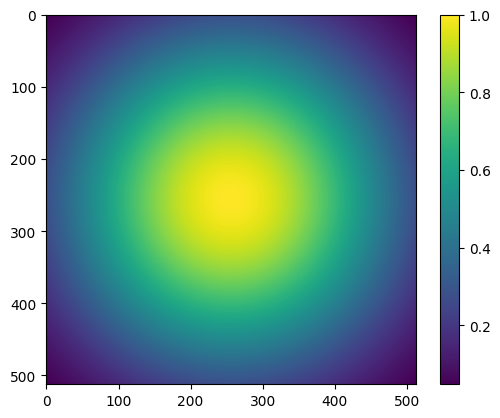

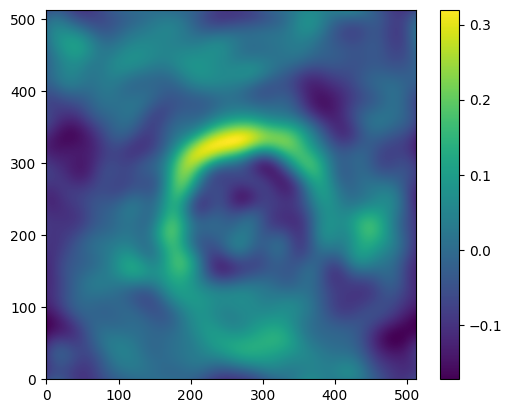

dx a entregar:  -2.777777777778e-06 deg


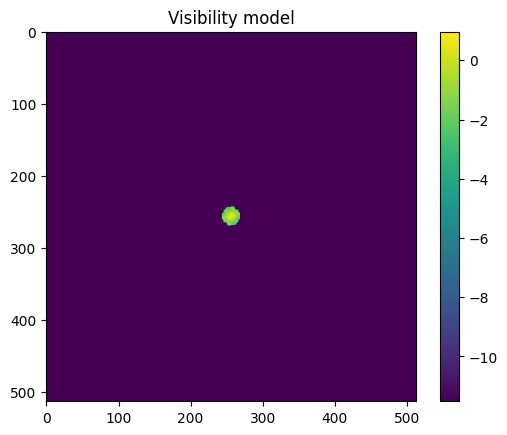

gridded_visibilities_2d:  (513, 513)
gridded_weights_2d:  (513, 513)
MAX FINAL: (0.00039954953604998204-9.379997591420186e-20j)
MIN FINAL: (-1.2803712530262652-0.19386532594172784j)


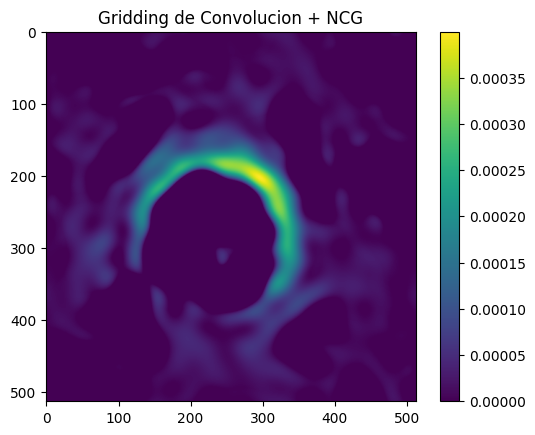

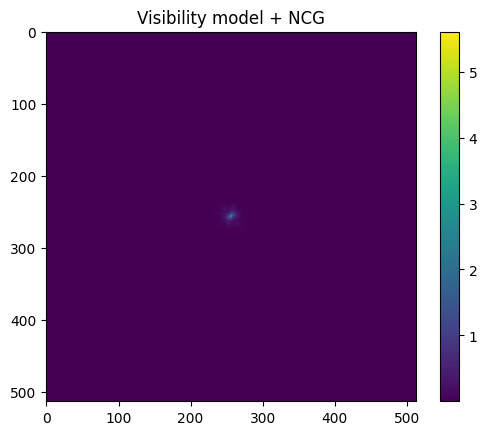

In [12]:
ejemplo_dg = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav_p513_cell_0.01.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms",
    plots = True
)

def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

visibilidades_grilladas, pesos_grillados, dx, u, v = ejemplo_dg.process_ms_file()

gridded_visibilities_2d = visibilidades_grilladas[0]  # (1,251,251)->(251,251)

title = "Visibility model"; fig = plt.figure(title); plt.title(title); im = plt.imshow(np.log(np.absolute(gridded_visibilities_2d) + 0.00001))
plt.colorbar(im)

plt.show()

gridded_weights_2d = pesos_grillados[0]  # (1,251,251)->(251,251)

print("gridded_visibilities_2d: ", visibilidades_grilladas[0].shape)
print("gridded_weights_2d: ", pesos_grillados[0].shape)


gc_image_1 = conjugate_gradient.ConjugateGradient(gridded_visibilities_2d, gridded_weights_2d/norm(gridded_weights_2d.flatten(), gridded_visibilities_2d.flatten()), 20)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))




title="Gridding de Convolucion + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

In [10]:
ejemplo1_hd142_grid = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav_p513_cell_0.01.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD142/hd142_b9cont_self_tav.ms", 
    25, 
    0.0797642938777464,
    verbose = False,
    plots = True
)

Pixel size of FITS on degree:  -2.777777777778e-06
Pixel size of FITS on radians:  -4.848136811095747e-08 rad
Image size of FITS:  513


self.pixel_size:  -4.848136811095747e-08 rad
self.image_size:  513
Resolución teórica:  1.0512941812754017e-06 rad
Tamaño de pixel en radianes:  -4.848136811095747e-08 rad


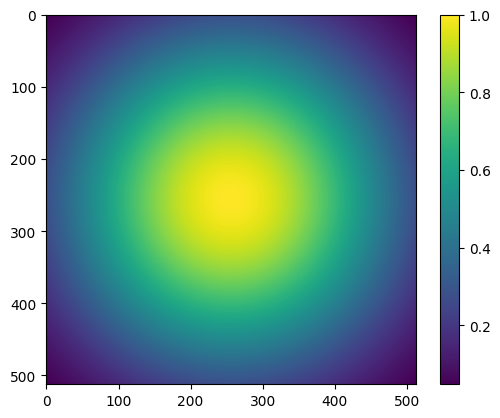

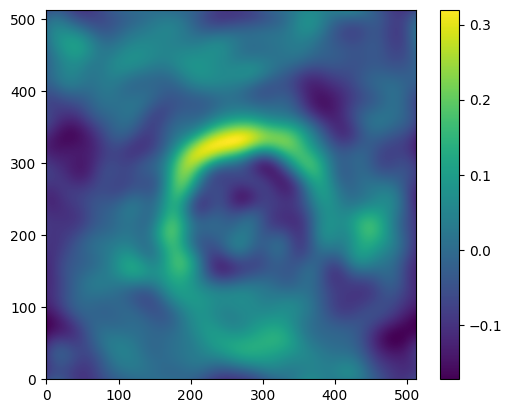

dx a entregar:  -4.848136811095747e-08 rad


In [6]:
gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v = ejemplo1_hd142_grid.grid_data()

gw_sparse.shape:  (505,)
u_sparse:  (505,)
v_sparse:  (505,)
z_sparse.shape:  (505,)


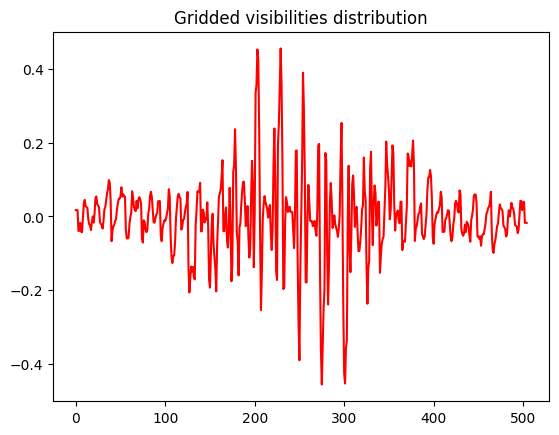

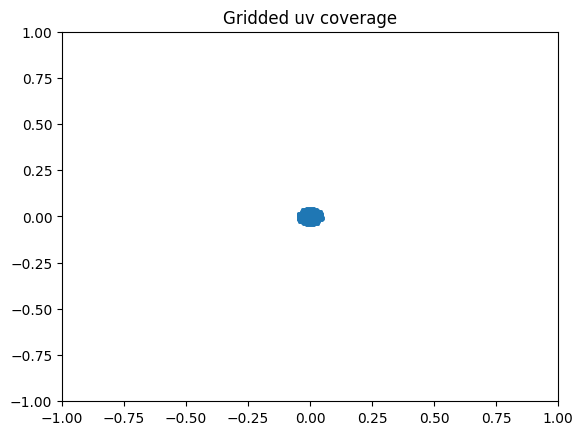

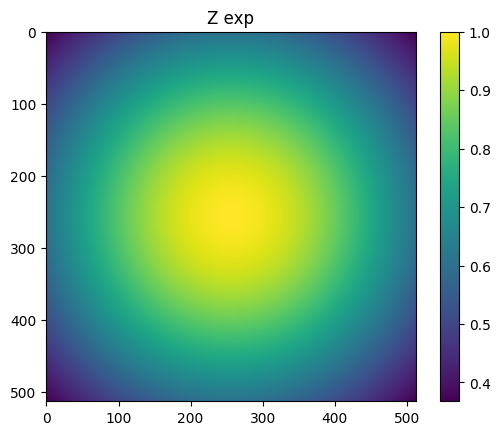

18
Max. polynomial degree: 25
Division: 0.0797642938777464
Sigma: 5053502.158093555
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
visibilities_mini.shape:  (263169,)
residual.shape:  (505,)
Tiempo de ejecución: 44.85 segundos
residual.shape:  (505,)


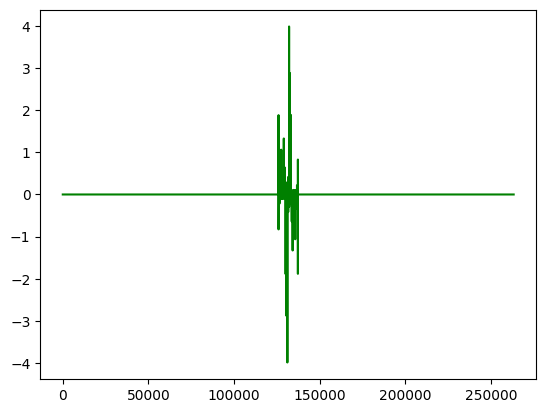

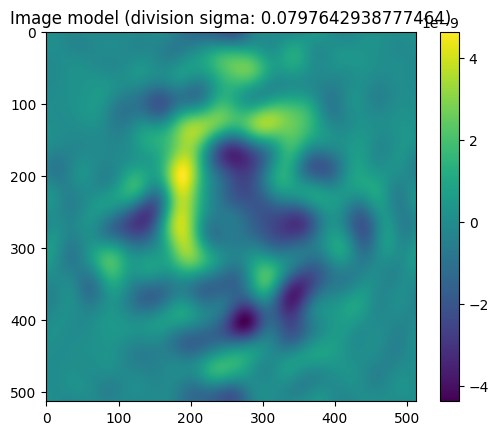

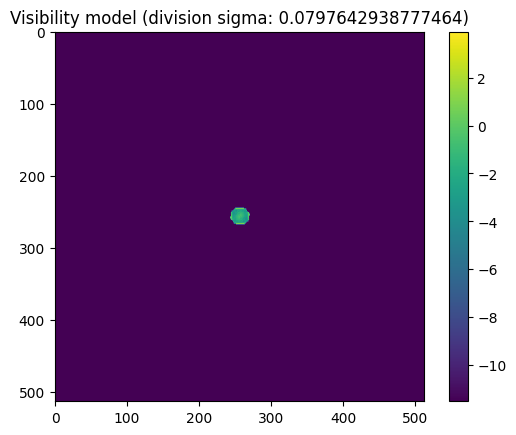

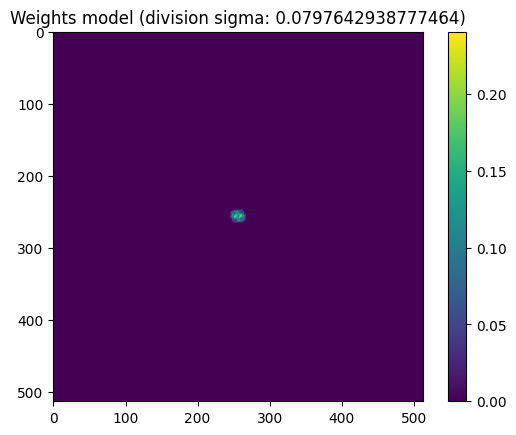

In [11]:
dirty_image, vis, weights, _, _ = ejemplo1_hd142_grid.gridded_data_processing(gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v)

MAX FINAL: (3.717924372976653e-12+6.919200585848528e-05j)
MIN FINAL: (-0.1964881727428458-0.018925648972910207j)


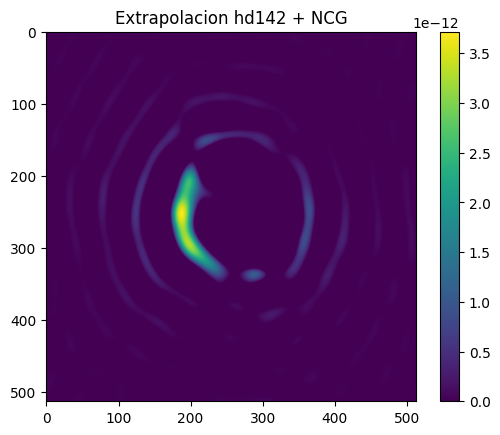

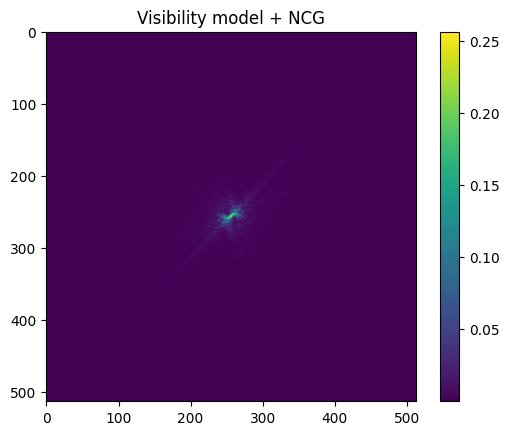

In [9]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 10)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Extrapolacion hd142 + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

visbilidades dim. MS:  (78779, 1, 2)
visibilidades gridd. MS:  (78779,)
u_target:  (251, 251)
v_target:  (251, 251)
Max. polynomial degree: 20
Division: 1e-07
Sigma: 4271172180.1757812
Polinomios inicializados.
Polinomios normalizados.


KeyboardInterrupt: 

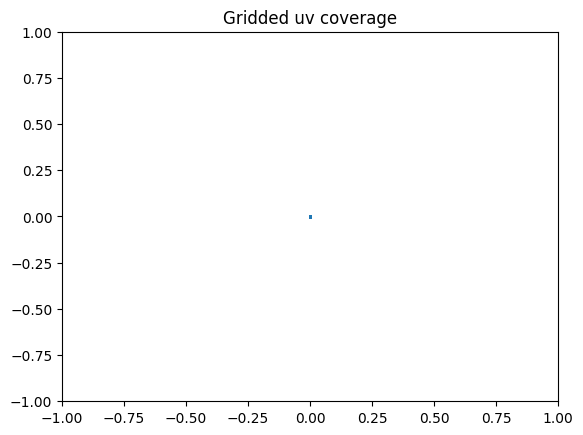

In [73]:
ejemplo_freq78_dg_2 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/FREQ78/FREQ78_p0.04_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/FREQ78/FREQ78.ms", 
	20, 
    10**(-7),
    5.555555555556e-07,
    251,
    verbose=False,
    plots=True
)

dirty_image, vis, weights, _, _ = ejemplo_freq78_dg_2.data_processing()

In [ ]:
gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v = ejemplo_freq78_dg_2.grid_data()

visbilidades dim. MS:  (78779, 1, 2)
visibilidades gridd. MS:  (78779,)
u_target:  (251, 251)
v_target:  (251, 251)
Max. polynomial degree: 25
Division: 0.001
Sigma: 427117.2180175781
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
Tiempo de ejecución: 26.74 segundos


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


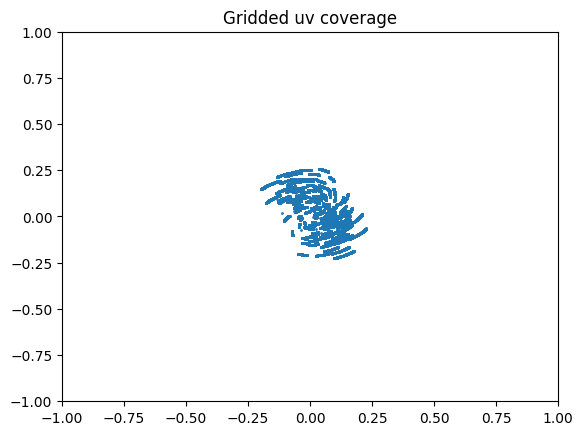

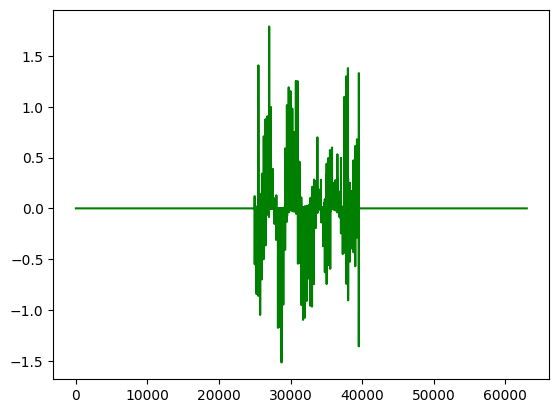

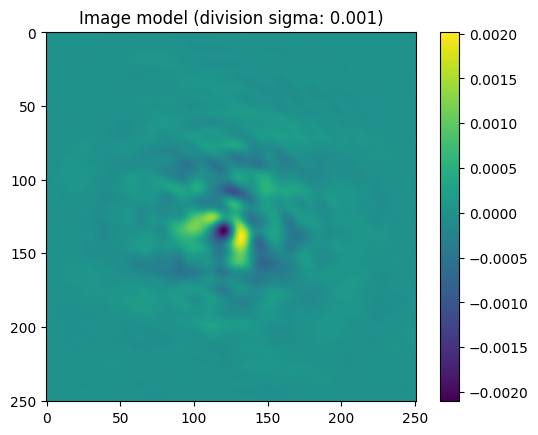

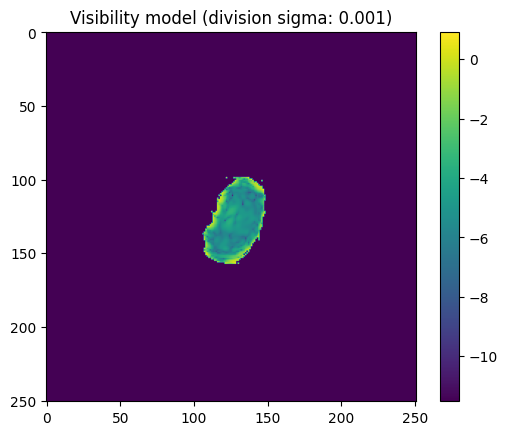

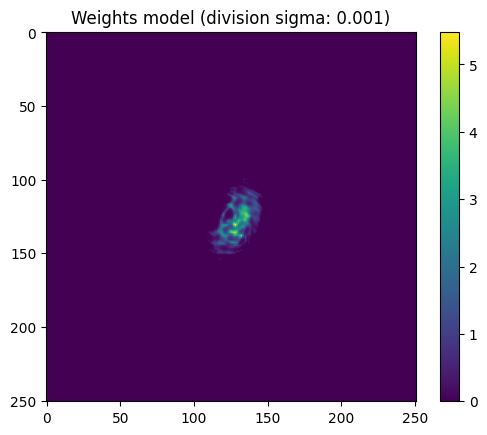

In [104]:
ejemplo_freq78_dc_2 = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/FREQ78/FREQ78_p0.04_n513.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/FREQ78/FREQ78.ms", 
	25, 
    1e-3,
    3.455555555556e-04,
    image_size = 251,
    verbose=False,
    plots=True
)

dirty_image, vis, weights, _, _ = ejemplo_freq78_dc_2.data_processing()

MAX FINAL: (3.323878103991308e-05+4.2666570087478826e-05j)
MIN FINAL: (-0.027116402071745937+0.00293012461577613j)


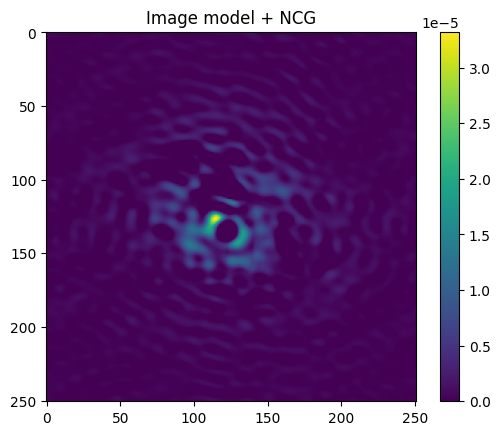

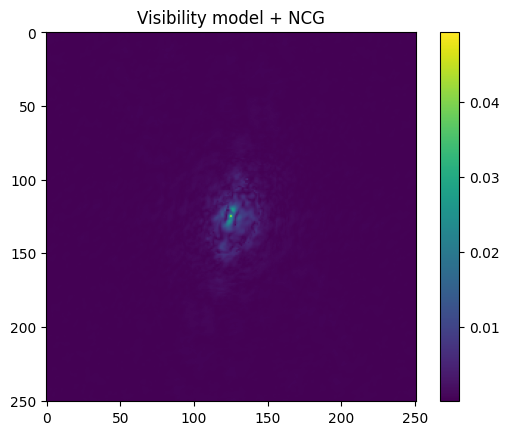

In [107]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_2 = conjugate_gradient.ConjugateGradient(vis, weights/norm(weights.flatten(), vis.flatten()), 10)

gc_image_data = gc_image_2.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))


title="Image model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

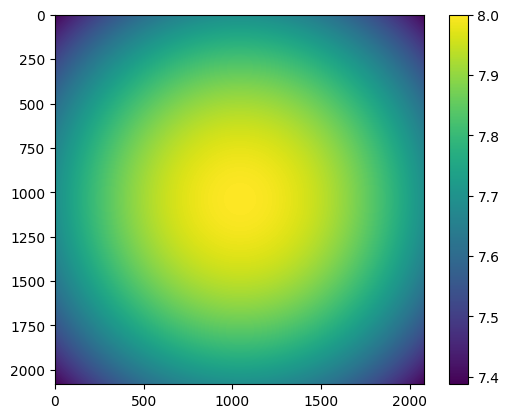

In [ ]:
visibilidades_grilladas_doar25, pesos_grillados_doar25 = ejemplo_dg_2.data_processing()

Resolución teórica:  1.0640410139730754e-07 rad
El valor de tamaño de pixel no ha sido ingresado, se usará el del archivo FITS.
Pixel size of FITS:  -1.388888888889e-06
Valor de FITS en radianes:  -2.4240684055478736e-08 rad


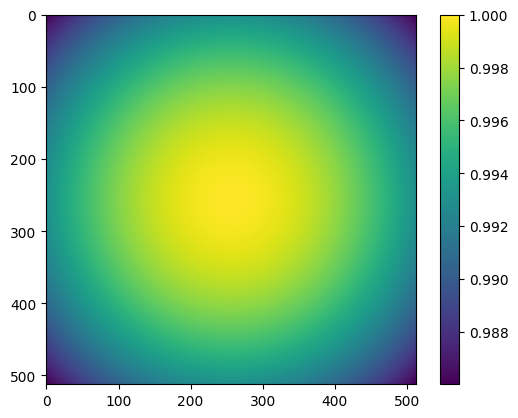

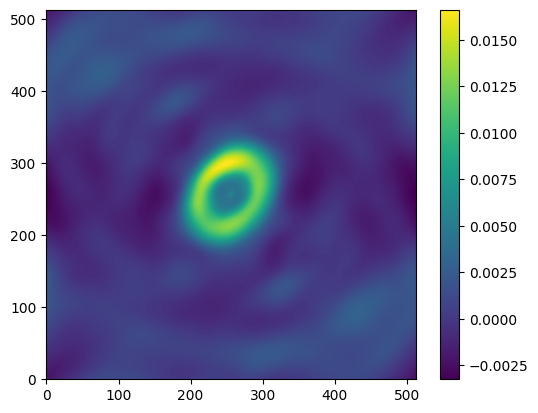

dx a entregar:  -2.4240684055478736e-08 rad
gridded_visibilities_2d:  (513, 513)
gridded_weights_2d:  (513, 513)


In [2]:
ejemplo_dg = preprocesamiento_datos_a_grillar.PreprocesamientoDatosAGrillar(
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13_p513_cell_0005.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13.ms",
    plots = True
)

def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

visibilidades_grilladas, pesos_grillados, dx, u, v = ejemplo_dg.process_ms_file()

gridded_visibilities_2d = visibilidades_grilladas[0]  # (1,251,251)->(251,251)
gridded_weights_2d = pesos_grillados[0]  # (1,251,251)->(251,251)

print("gridded_visibilities_2d: ", visibilidades_grilladas[0].shape)
print("gridded_weights_2d: ", pesos_grillados[0].shape)




MAX FINAL: (5.784018410417913e-05+1.287530297622069e-20j)
MIN FINAL: (-0.11135510330828913+0.008980062945092347j)


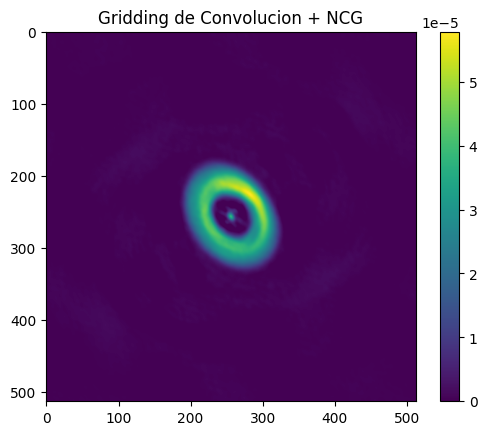

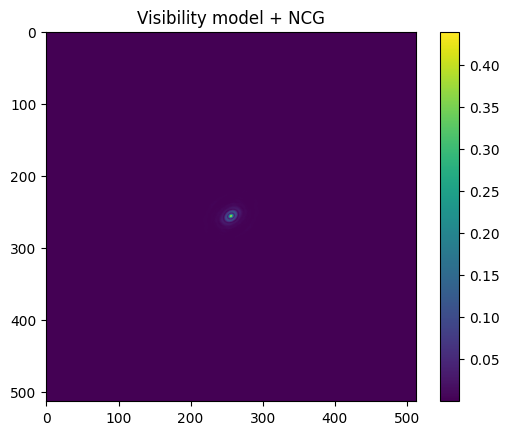

In [3]:
gc_image_1 = conjugate_gradient.ConjugateGradient(gridded_visibilities_2d, gridded_weights_2d/norm(gridded_weights_2d.flatten(), gridded_visibilities_2d.flatten()), 10)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))


print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))




title="Gridding de Convolucion + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

In [5]:
fits_image = fits.open("/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13_p513_cell_0005.fits")

header = fits_image[0].header

fits.writeto("hola_hd100546.fits", np.real(gc_image_model), header, overwrite=True)

In [10]:
ejemplo1_hd100546_grid = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13_p513_cell_0005.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13.ms",  
	num_polynomial=50, 
    division_sigma=0.6446652012699556,
    verbose = False,
    plots = True
)


Pixel size of FITS on degree:  -1.388888888889e-06
Pixel size of FITS on radians:  -2.4240684055478736e-08 rad
Image size of FITS:  513


In [ ]:
gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v = ejemplo1_hd100546_grid.grid_data()

gw_sparse.shape:  (7495,)
u_sparse:  (7495,)
v_sparse:  (7495,)
z_sparse.shape:  (7495,)


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



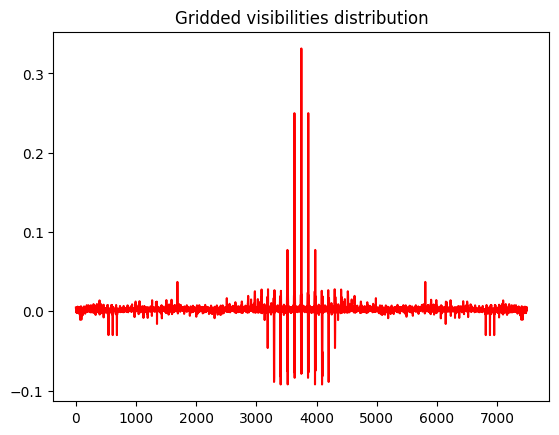

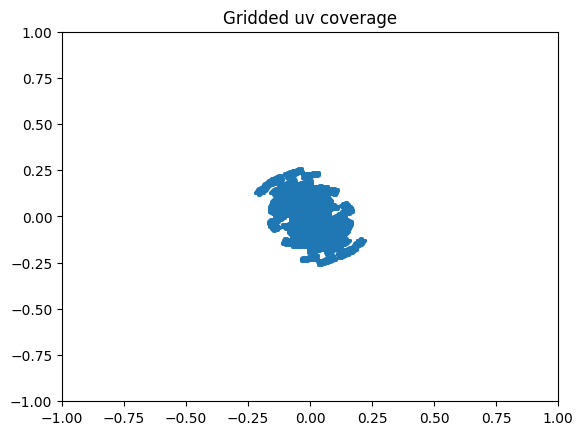

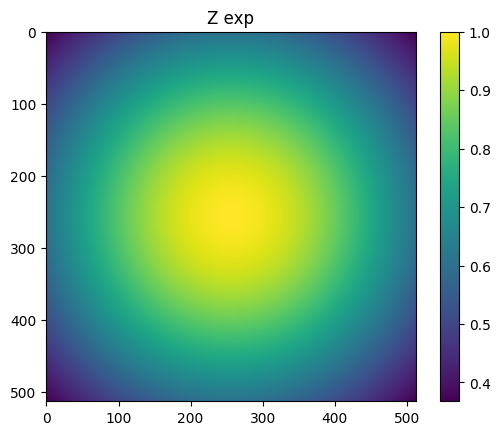

21
Max. polynomial degree: 35
Division: 0.6446652012699556
Sigma: 30135285.66724173
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
visibilities_mini.shape:  (263169,)
residual.shape:  (7495,)
Tiempo de ejecución: 247.77 segundos
residual.shape:  (7495,)


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



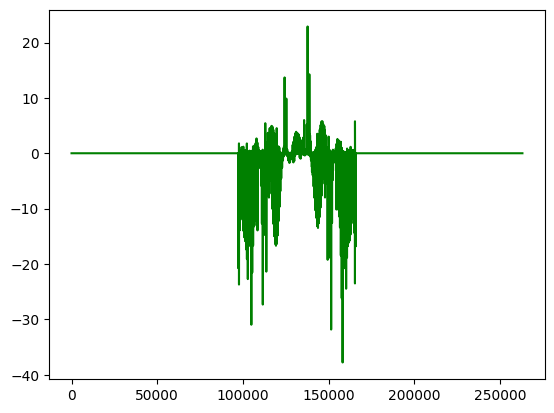

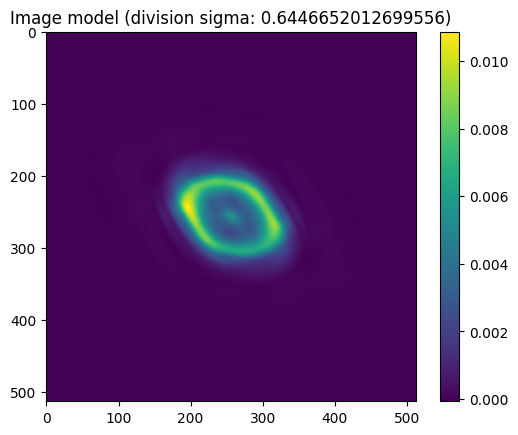

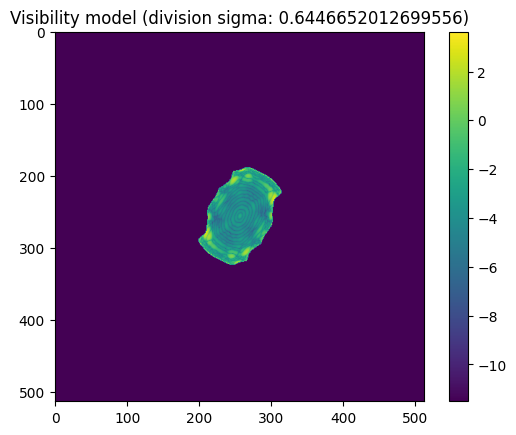

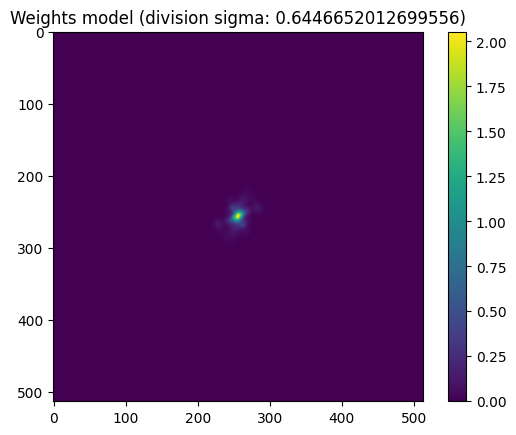

In [4]:
dirty_image, vis, weights, _, _ = ejemplo1_hd100546_grid.gridded_data_processing(gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


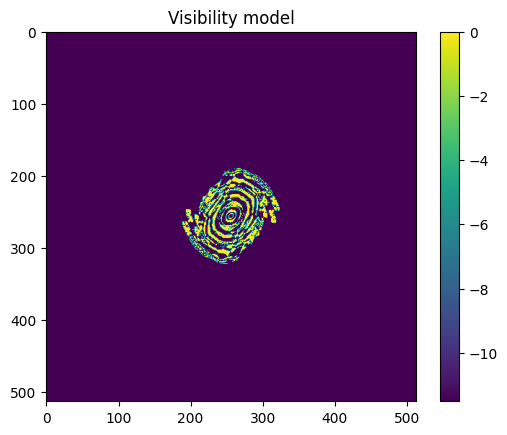

In [5]:

gridded_visibilities_2d = gridded_visibilities[0]
vis_orig_binario = (gridded_visibilities_2d > 0).astype(int)
vis_agregadas_binario = (vis > 0).astype(int)
vis_agregadas = vis_agregadas_binario - vis_orig_binario

print(vis_orig_binario)

title = "Visibility model"; fig = plt.figure(title); plt.title(title); im = plt.imshow(np.log(np.absolute(vis_agregadas) + 0.00001))
plt.colorbar(im)

plt.show()


[[1.39585512e-08 1.99304638e-09 3.92970451e-22 ... 5.29948314e-08
  4.23949860e-08 2.83201358e-08]
 [2.27341974e-08 6.50035295e-09 1.10295908e-21 ... 5.76090116e-08
  5.17084372e-08 3.90188101e-08]
 [3.20128165e-08 1.39423186e-08 2.97204543e-23 ... 5.31389962e-08
  5.44981640e-08 4.67437738e-08]
 ...
 [4.44092072e-09 4.01828451e-09 2.37312120e-09 ... 1.27938690e-08
  7.67798554e-09 5.16516071e-09]
 [4.13010292e-09 1.52614510e-09 1.18520631e-22 ... 2.64623516e-08
  1.67414025e-08 9.05993130e-09]
 [7.40858596e-09 5.29252451e-10 7.72731812e-22 ... 4.13971136e-08
  2.95293549e-08 1.74563096e-08]]
MAX FINAL: (3.757797105873572e-05+5.044230155307135e-07j)
MIN FINAL: (-0.04354521152869948-0.0008170923099524638j)


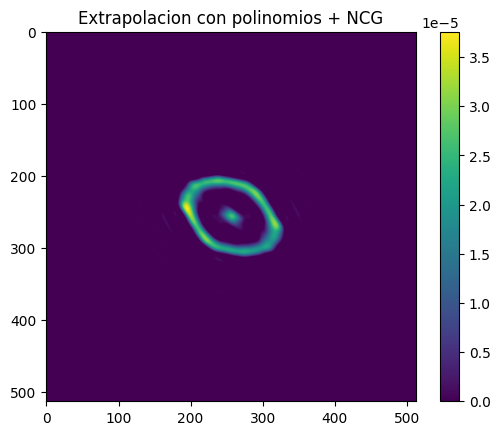

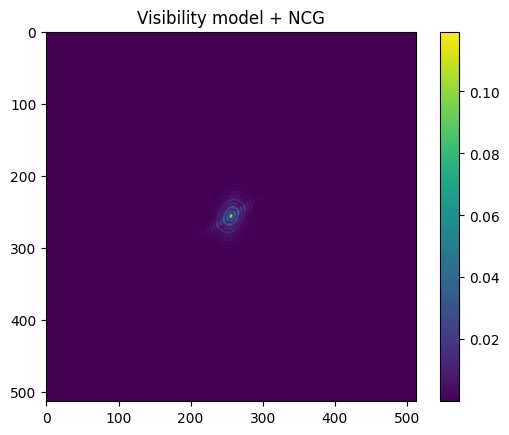

In [56]:
def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_1 = conjugate_gradient.ConjugateGradient(vis, weights/ norm(weights.flatten(),vis.flatten()), 7)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))

print(np.real(gc_image_model))

print("MAX FINAL:",np.max(gc_image_model))

print("MIN FINAL:",np.min(visibility_model))



title="Extrapolacion con polinomios + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)


plt.show()

0.11575136033307011


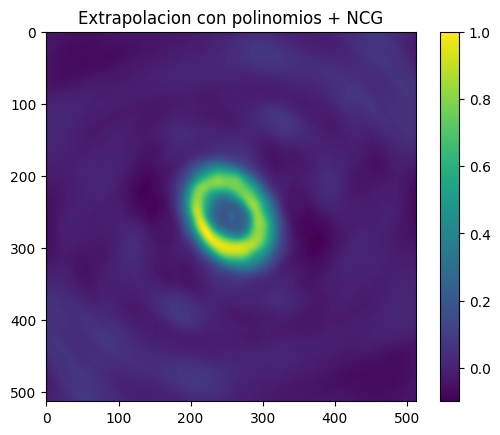

In [62]:
def comp_imagenes_model(imagen_verdad, imagen_algoritmo):
    imagen_verdad/=np.max(imagen_verdad)
    
    imagen_algoritmo/=np.max(imagen_algoritmo)
    
    imagen_residuo = imagen_verdad - imagen_algoritmo
    
    desviacion = np.std(imagen_residuo)
    
    return desviacion


fits_image = fits.open("/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13_p513_cell_0005.fits")

header = fits_image[0].header
data = fits_image[0].data.squeeze()

desv = comp_imagenes_model(data, np.real(gc_image_model))

print(desv)

title="Extrapolacion con polinomios + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(data)
plt.colorbar(im)

In [64]:
fits.writeto("hola.fits", np.real(gc_image_model), header, overwrite=True)

NpzFile '/disk2/stephan/gridded_visibility_model_natural_num_polynomial_19_division_sigma_0.0001_pixel_size_-3.88888888889e-09_image_size_513_513_HD100546.npz' with keys: arr_0


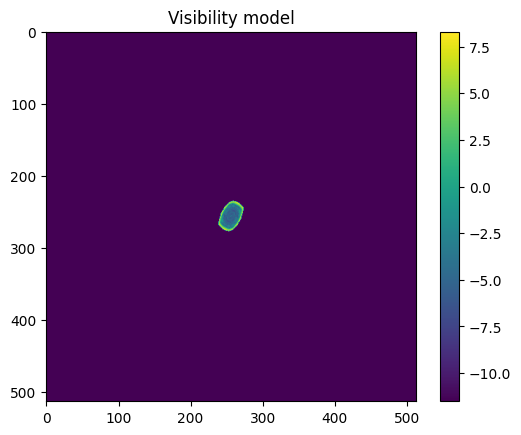

In [6]:
# Nombre de archivo a cargar
namefile_fulldata = "/disk2/stephan/gridded_visibility_model_natural_num_polynomial_19_division_sigma_0.0001_pixel_size_-3.88888888889e-09_image_size_513_513_HD100546.npz"

# Cargar archivo de entrada
full_data = np.load(namefile_fulldata)

visibilities = full_data["arr_0"]

print (full_data)

title = "Visibility model"; fig = plt.figure(title); plt.title(title); im = plt.imshow(np.log(np.absolute(visibilities) + 0.00001))
plt.colorbar(im)

plt.show()


self.pixel_size:  1.5200585913901078e-08
self.image_size:  513
Resolución teórica:  1.0640410139730754e-07 rad


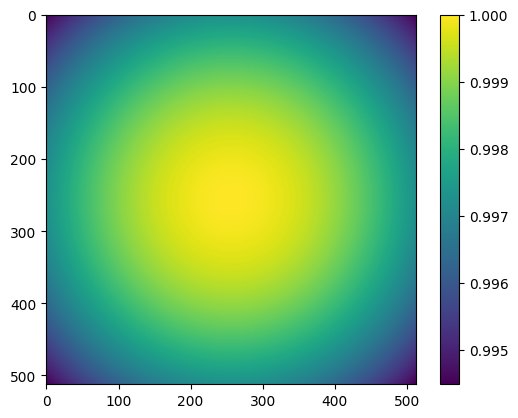

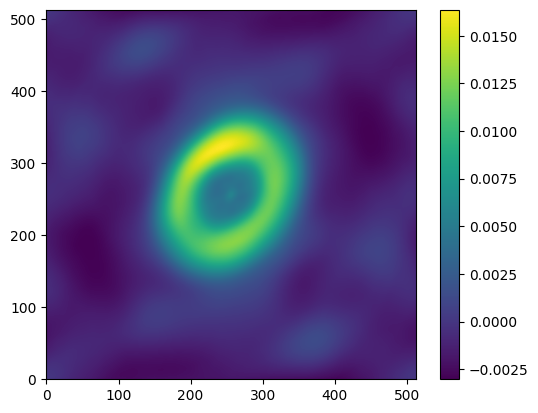

dx a entregar:  1.5200585913901078e-08 rad
gw_sparse.shape:  (7495,)
u_sparse:  (7495,)
v_sparse:  (7495,)
z_sparse.shape:  (7495,)


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



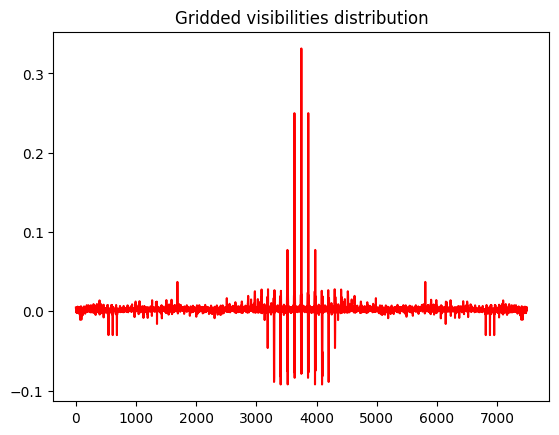

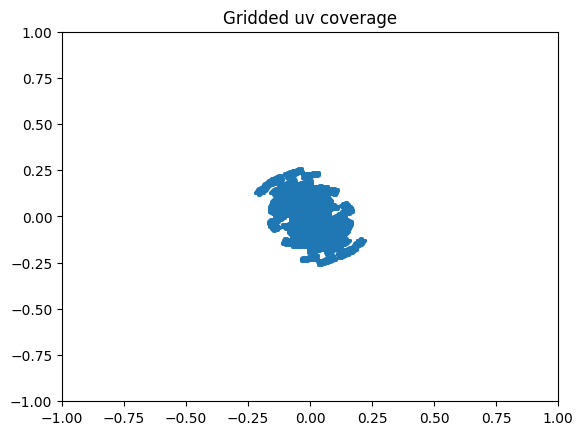

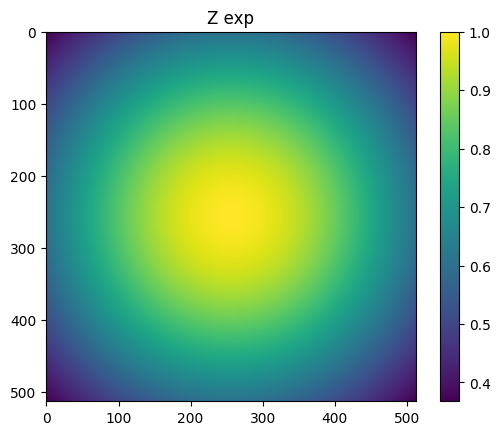

21
Max. polynomial degree: 80
Division: 0.6446652012699556
Sigma: 30135285.66724173
Polinomios inicializados.
Polinomios normalizados.


OutOfMemoryError: Out of memory allocating 26,948,505,600 bytes (allocated so far: 767,518,208 bytes).

In [16]:
ejemplo1_hd100546_grid = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
	"/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13_p513_cell_0005.fits",
    "/disk2/stephan/TesisAlgoritmoParalelo/datasets/HD100546/hd100546_selfcal_cont_13.ms",  
	num_polynomial = 50, 
    division_sigma = 0.6446652012699556,
    verbose = False,
    plots = True
)


gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v = ejemplo1_hd100546_grid.grid_data()

dirty_image, vis, weights, _, _ = ejemplo1_hd100546_grid.gridded_data_processing(gridded_visibilities, gridded_weights, pixel_size, grid_u, grid_v)

def norm(weights,x):
    return(np.absolute(np.sqrt(np.sum(weights*np.absolute(x)**2))))

gc_image_1 = conjugate_gradient.ConjugateGradient(vis, weights/ norm(weights.flatten(),vis.flatten()), 7)

gc_image_data = gc_image_1.CG()

visibility_model = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(gc_image_data)))

gc_image_model = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(visibility_model)))

title="Extrapolacion con polinomios + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.real(gc_image_model))
plt.colorbar(im)

title="Visibility model + NCG"; fig=plt.figure(title); plt.title(title); im=plt.imshow(np.absolute(visibility_model))
plt.colorbar(im)

plt.show()

NpzFile '/disk2/stephan/gridded_visibility_model_natural_num_polynomial_20_division_sigma_0.023107219110480887_pixel_size_-2.9088820866577977e-08 rad_image_size_313_313_V866 Sco.npz' with keys: arr_0


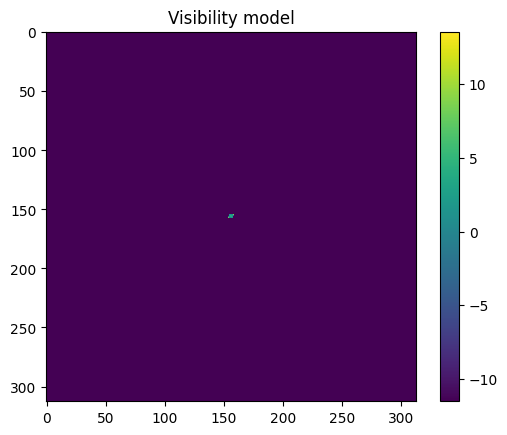

In [3]:
from matplotlib import pyplot as plt
import numpy as np

# Nombre de archivo a cargar
namefile_fulldata = "/disk2/stephan/gridded_visibility_model_natural_num_polynomial_20_division_sigma_0.023107219110480887_pixel_size_-2.9088820866577977e-08 rad_image_size_313_313_V866 Sco.npz"

# Cargar archivo de entrada
full_data = np.load(namefile_fulldata)

visibilities = full_data["arr_0"]

print (full_data)

title = "Visibility model"; fig = plt.figure(title); plt.title(title); im = plt.imshow(np.log(np.absolute(visibilities) + 0.00001))
plt.colorbar(im)

plt.show()


Pixel size of FITS on degree:  -1.666666666667e-06
Pixel size of FITS on radians:  -2.9088820866577977e-08 rad
Image size of FITS:  313
self.pixel_size:  -2.9088820866577977e-08 rad
self.image_size:  313
Resolución teórica:  8.080212858592424e-08 rad
Tamaño de pixel en radianes:  -2.9088820866577977e-08 rad


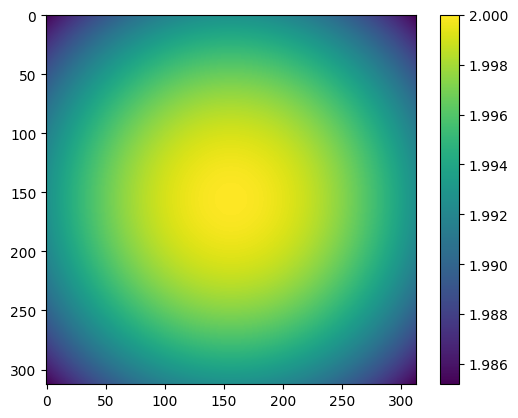

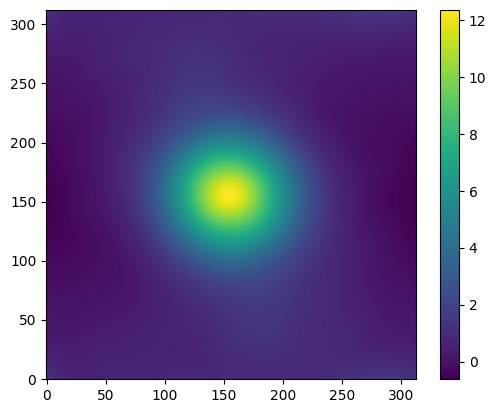

dirty_mapper.uvgridded_visibilities:  (1, 313, 313)
dirty_mapper.uvgridded_weights:  (1, 313, 313)
dx a entregar:  -2.9088820866577977e-08 rad
u_data :  (16603,)
v_data:  (16603,)
u_sparse:  (16603,)
v_sparse:  (16603,)
z_sparse.shape:  (16603,)


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



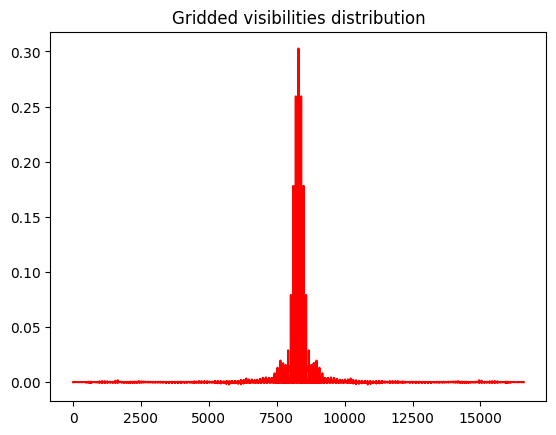

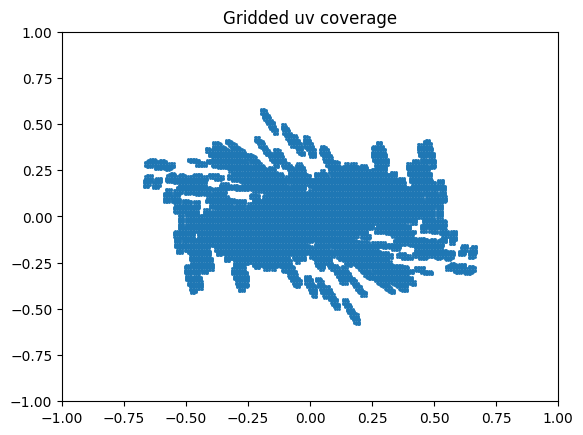

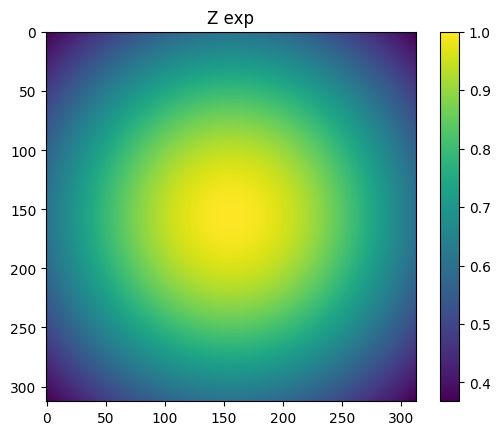

31
Max. polynomial degree: 30
Division: 0.023107219110480887
Sigma: 14712185589.039715
Tamaños antes de llamar a initialize_polynomials_cpu:
z.shape: (16603,)
z_target.shape: (97969,)
w.shape: (16603,)
s: 30
z shape: <object type:UniTuple(int64 x 1)>, z_target shape: <object type:UniTuple(int64 x 1)>, w shape: <object type:UniTuple(int64 x 1)>, s: 30
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
visibilities_mini.shape:  (97969,)
residual.shape:  (16603,)
residual.shape:  (16603,)
El objeto en el archivo FITS es: V866 Sco


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



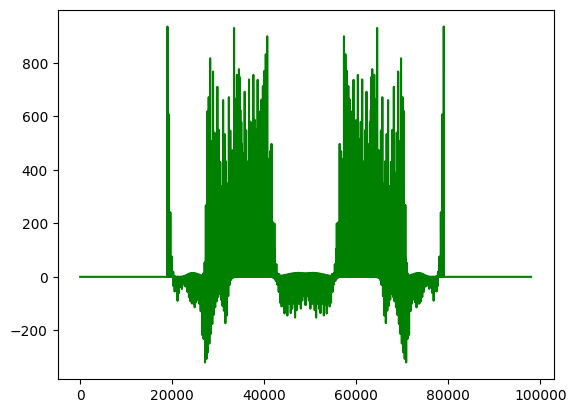

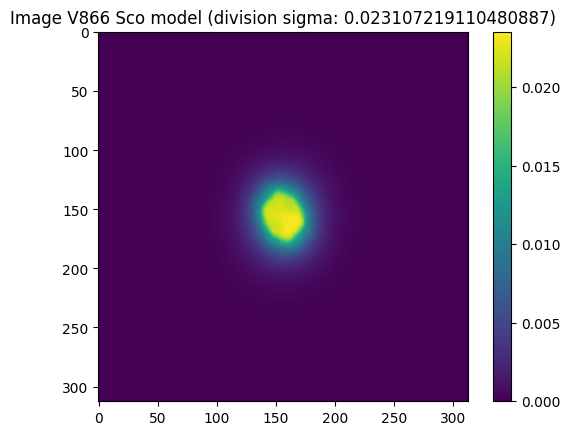

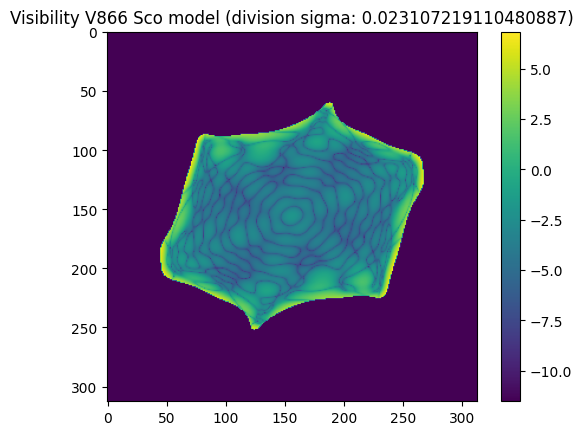

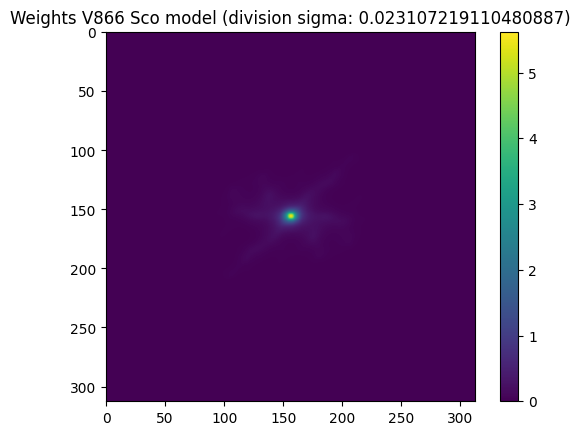

Tiempo de ejecución: 56.39 segundos


ValueError: too many values to unpack (expected 5)

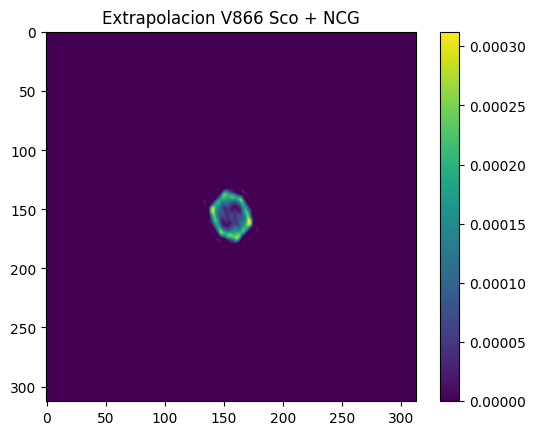

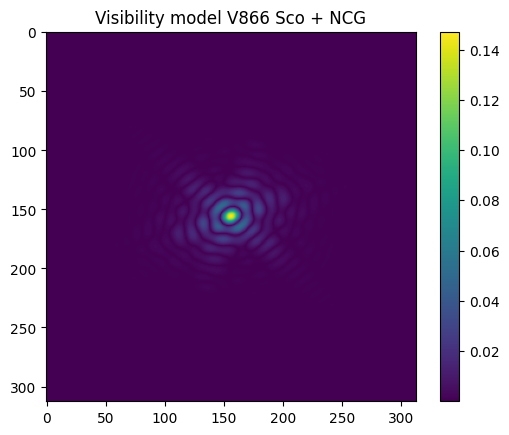

In [3]:
ejemplo_dg_as205 = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
    "/disk2/stephan/datasets/HD143006/HD143006_p251_cell_0.015.fits",
    "/disk2/stephan/datasets/HD143006/HD143006_continuum_model.ms", 
    num_polynomial=80, 
    division_sigma=0.023107219110480887, 
    verbose=True,
    plots=True
)

dirty_image_as205, vis_gridded_as205, weights_gridded_as205, _, _ , reconstruct_image_as205, vis_cg_as205 = ejemplo_dg_as205.data_processing()

In [2]:
grid_conv_sz114 = procesamiento_datos_grillados.ProcesamientoDatosGrillados(
    "/disk2/stephan/datasets/HD142/hd142_p251_cell_0.03.fits",
    "/disk2/stephan/datasets/HD142/hd142_b9cont_self_tav_model.ms",
    num_polynomial=15,
    division_sigma=0.05,
    verbose=True)

reconstructed_image, vis_recons_image = grid_conv_sz114.convolutional_gridding()

Pixel size of FITS on degree:  -8.333333333333e-06
Pixel size of FITS on radians:  -1.4544410433285499e-07 rad
Image size of FITS:  251
Resolución teórica:  1.0512941812754017e-06 rad
El valor de tamaño de pixel no ha sido ingresado, se usará el del archivo FITS (está en grados).
Valor de FITS en grados:  -8.333333333333e-06
dx a entregar:  -8.333333333333e-06 deg
El objeto en el archivo FITS es: HD 142527


Image size of FITS:  251
Resolución teórica de MS:  1.501848830393431e-07 rad
visibilidades dim. MS:  (15125, 1, 2)
visibilidades gridd. MS:  (15125,)
u_target:  (251, 251)
v_target:  (251, 251)
chunk_data:  21
Max. polynomial degree: 20
Division: 0.1
Sigma: 6988.3416748046875
Polinomios inicializados.
Polinomios normalizados.
Hice G-S.
Tiempo de ejecución: 7.53 segundos
El objeto en el archivo FITS es: HD 142527


/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/disk2/stephan/anaconda3/envs/pyralysis-env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part



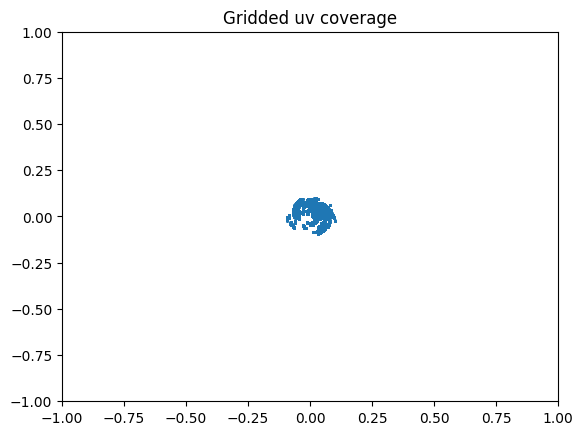

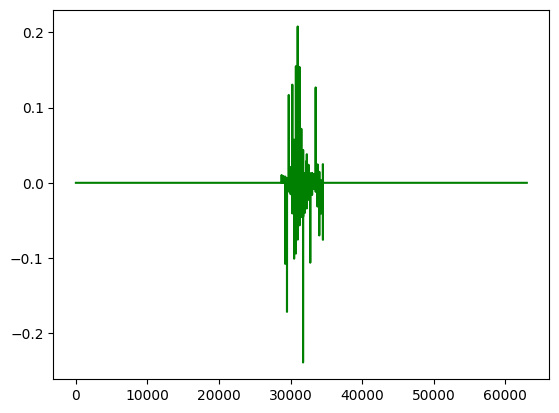

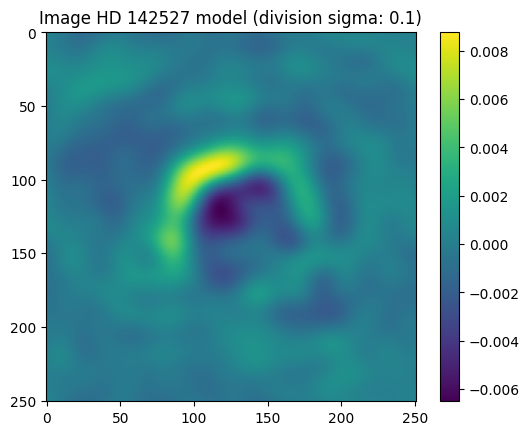

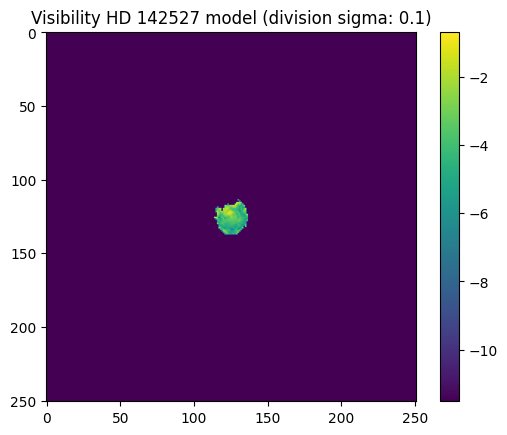

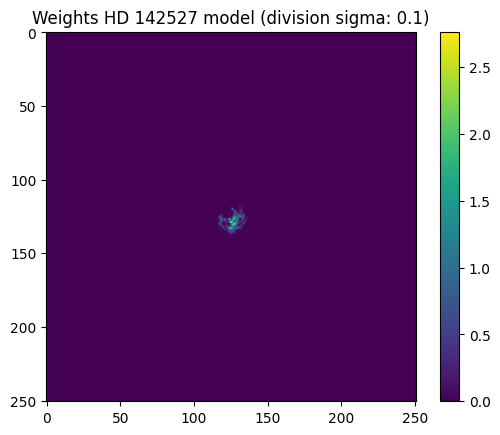

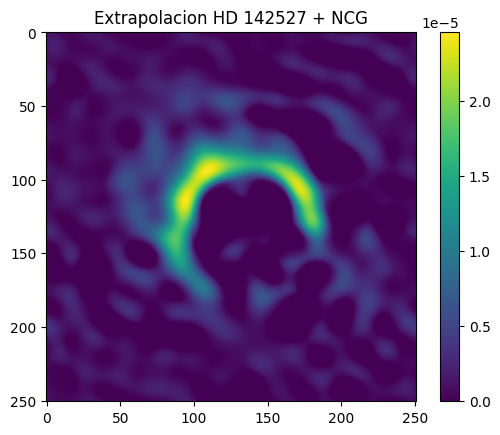

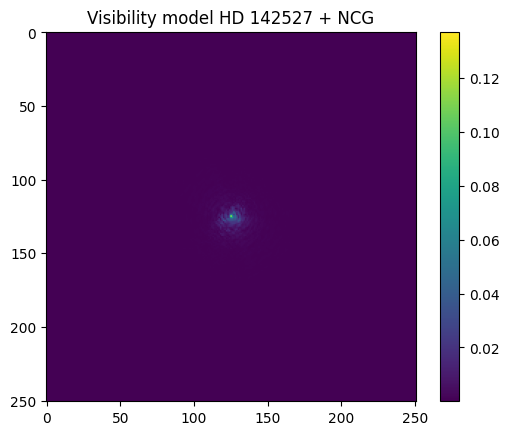

In [10]:
ejemplo_dc = procesamiento_datos_continuos.ProcesamientoDatosContinuos(
    fits_path="/disk2/stephan/datasets/HD142/hd142_p251_cell_0.03.fits",
    ms_path="/disk2/stephan/datasets/HD142/hd142_b9cont_self_tav.ms", 
    num_polynomial=20,
    division_sigma=10**(-1),
    pixel_size=0.2544410433285499e-03,
    verbose=False,
    plots=True
)

dirty_image, pesos, visibilidades, _, _ = ejemplo_dc.data_processing()